# **Loan EDA Case Study**

### Project Type - Loan Exploratory Data Analysis
### Contribution - Snehal Jadhav / Shrey Jain
### Name - Snehal Amol Jadhav
### GitHub Link - https://github.com/snehaljadhav2283/Loan_CaseStudy_EDA

### Project Summary








### Problem Statement





### Let's Start 

## Importing Libraries

In [1769]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     #for visualization
%matplotlib inline
import seaborn as sns               #for visualization
import warnings
warnings.filterwarnings('ignore')
import math

## Load Loan Dataset

In [1770]:
loan_df = pd.read_csv('loan.csv')
loan_df.shape

(39717, 111)

In [1771]:
loan_df.dtypes
#loan_df.head().T

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

## Observations
   * Dataset contains 39717 rows and 111 columns
   * Dataset contains both numerical and categorical variable
   * Let's try now and understand different types of variables that dataset holds
   * Please refer Data_Dicitionary.xlsx that contain all variables related to Dataset and for further analysis through out we are going to consider these variables to resolve our business problem statement

 
                                                                               
   

## Data Exploration and Data Cleaning

In [1772]:
# Let's check what are the variables here

loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit'], dtype='object', length=111)

In [1773]:
#since we are not able to view all the output correct, let's set the default max columns, row and width for output size window to analyze it correctly. This will help you to see the full output
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 5000)
pd.set_option('display.expand_frame_repr', False)

In [1774]:
#checking shape of loan dataset
loan_df.shape

(39717, 111)

In [1775]:
#basic information about loan dataset
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [1776]:
loan_df_defaulters = loan_df
# check duplicate rows in dataset
loan_df_defaulters = loan_df_defaulters.drop_duplicates()
loan_df_defaulters.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.0,863.16,0.0,0.0,0.0,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Check Null Columns

In [1777]:
loan_df_defaulters.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


### Drop All NAN columns

In [1778]:

loan_df_defaulters = loan_df_defaulters.dropna(axis=1, how='all')


In [1779]:
# out of 111 columns, 54 columns had all rows data equal to na
loan_df_defaulters.shape

(39717, 57)

In [1780]:
# Let's check null columns further
loan_df_defaulters.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

#### Percentage wise missing data for above 

In [1781]:
100*loan_df_defaulters.isnull().mean()

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [1782]:
# These columns have more than 50 percent null values
null_col = ["mths_since_last_delinq","next_pymnt_d","mths_since_last_record"]
loan_df_defaulters = loan_df_defaulters.drop(null_col, axis=1)

In [1783]:
loan_df_defaulters.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

### Metadata Columns - Let's find out Columns that will not be in use for Analysis

In [1784]:

#exploring nunique
loan_df_defaulters.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26526
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

### Metadata Columns - Let's ignore as these columns cannot be used for assesment of our Business Problem Statement i.e. likely defaulting customer
  * emp_title - The job title supplied by the Borrower when applying for the loan.
  * id - A unique LC assigned ID for the loan listing.
  * desc - description provided by borowers
  * member_id - A unique LC assigned Id for the borrower member.
  * title - The loan title provided by the borrower
  * url - URL for the LC page with listing data.
  * addr_state - The state provided by the borrower in the loan application
  * zip_code - The first 3 numbers of the zip code provided by the borrower in the loan application.

  #### Also below doesn't serve purpose for analysis
  * application_type - Indicates whether the loan is an individual application or a joint application with two co-borrowers
  * acc_now_delinq - The number of accounts on which the borrower is now delinquent.
  * chargeoff_within_12_mths - Number of charge-offs within 12 months
  * delinq_amnt - The past-due amount owed for the accounts on which the borrower is now delinquent.
  * tax_liens - Number of tax liens
  * policy_code
  * last_pymnt_d
  * last_credit_pull_d
  * issue_d
  * earliest_cr_line


  

In [1785]:
# Data related to employee is a metadata which will not be used for analysis and these are termed as Extra columns 
 
extra_col = ["emp_title", "id", "desc", "member_id", "title", "url", "addr_state", "zip_code", "application_type", "acc_now_delinq", "chargeoff_within_12_mths", "delinq_amnt", "tax_liens","policy_code","last_pymnt_d","last_credit_pull_d","issue_d","earliest_cr_line"]
loan_df = loan_df_defaulters.drop(extra_col, axis=1)

In [1786]:
# Now we have 43 columns for analysis
loan_df_defaulters.shape

(39717, 54)

In [1787]:
loan_df_defaulters.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

### Drop Unimportant Columns or Irrelevant to case study



In [1788]:
loan_df_defaulters = loan_df_defaulters.drop(["recoveries","collection_recovery_fee", "revol_util", "total_pymnt", "total_pymnt_inv", "out_prncp", "out_prncp_inv", "collections_12_mths_ex_med"], axis=1)

In [1789]:
loan_df_defaulters.isnull().sum()

id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                    2459
emp_length                   1075
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
url                             0
desc                        12942
purpose                         0
title                          11
zip_code                        0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
open_acc                        0
pub_rec       

### Impute Columns
    * emp_length - Impute it with most common occured i.e using mode concept for the missing values
    * pub_rec_bankruptcies - Assuming if public bankruptcy record is missing for person, we can impute it with most common  occurred i.e. mode
    * term
    * int_rate

In [1790]:
#loan_df["emp_length"].mode()
loan_df_defaulters.emp_length = loan_df_defaulters.emp_length.fillna(loan_df_defaulters.emp_length.mode()[0])
#loan_df["emp_length"]= loan_df["emp_length"].fillna(loan_df["emp_length"].mode()[0], inplace= True)

In [1791]:
loan_df_defaulters.isna().sum()

id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                    2459
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
url                             0
desc                        12942
purpose                         0
title                          11
zip_code                        0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
open_acc                        0
pub_rec       

In [1792]:
loan_df_defaulters.pub_rec_bankruptcies.mode()

0    0.0
Name: pub_rec_bankruptcies, dtype: float64

In [1793]:
loan_df_defaulters.pub_rec_bankruptcies = loan_df_defaulters.pub_rec_bankruptcies.fillna(loan_df_defaulters.pub_rec_bankruptcies.mode()[0])

In [1794]:
loan_df_defaulters.isna().sum()

id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                    2459
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
url                             0
desc                        12942
purpose                         0
title                          11
zip_code                        0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
open_acc                        0
pub_rec       

### Clean up on columns
* term - remove months
* int_rate - remove percentage

In [1795]:
loan_df_defaulters.term = loan_df_defaulters.term.apply(lambda x: int(x.replace("months", "")))
print(loan_df_defaulters.term.dtype)
loan_df_defaulters.int_rate = loan_df_defaulters.int_rate.replace("%","", regex=True).astype(float)
print(loan_df_defaulters.int_rate.dtype)

int64
float64


In [1796]:
loan_df_defaulters.dtypes

id                            int64
member_id                     int64
loan_amnt                     int64
funded_amnt                   int64
funded_amnt_inv             float64
term                          int64
int_rate                    float64
installment                 float64
grade                        object
sub_grade                    object
emp_title                    object
emp_length                   object
home_ownership               object
annual_inc                  float64
verification_status          object
issue_d                      object
loan_status                  object
pymnt_plan                   object
url                          object
desc                         object
purpose                      object
title                        object
zip_code                     object
addr_state                   object
dti                         float64
delinq_2yrs                   int64
earliest_cr_line             object
inq_last_6mths              

### Identify Date Columns and convert to Date Time Date Type

In [1797]:
def validate_year(date) :
    temp = date.split('-')[1]
    length = len(temp)
    if length == 2 :
        temp = "20"+temp
    else :
        temp = "200"+temp
        
    return temp 

In [1799]:
loan_df_defaulters['issue_year'] = loan_df_defaulters['issue_d'].apply(validate_year)

### Business Problem Statement Variables

In [ ]:
# Create a set of Numerical columns, Categorical columns and Extra Columns
#cols_category = loan_df.select_dtypes(include="object").columns
#print(cols_category)
#cols_numerical = loan_df.select_dtypes(include=["float", "int"]).columns
#print(cols_numerical)
num_col =  ["funded_amnt", "funded_amnt_inv", "annual_inc",  "int_rate", "loan_amnt"]
cat_col =  ["grade","sub_grade", "emp_length", "verification_status", "home_ownership", "purpose", "loan_status", "term"]
date_col = ["issue_d","issue_year"]

In [ ]:
loan_df_defaulters[num_col] = loan_df_defaulters[num_col].apply(pd.to_numeric)

### No of Loan Applicants vs Employee Length (Years Duration)

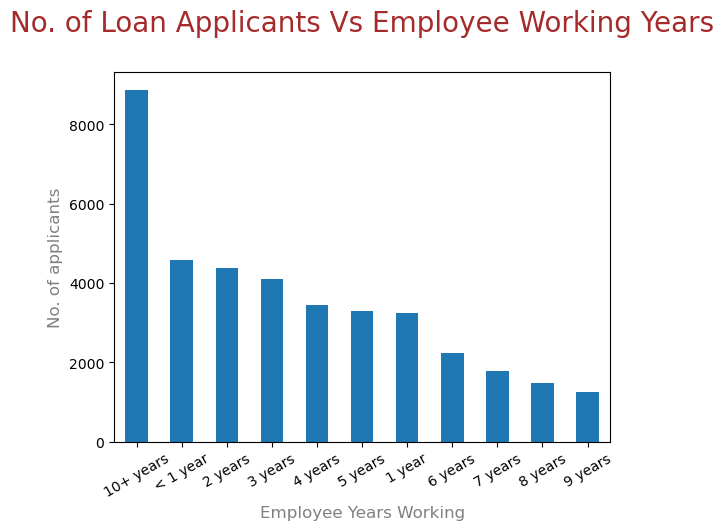

In [ ]:
loan_df.emp_length.value_counts().plot(kind="bar")
plt.title("No. of Loan Applicants Vs Employee Working Years\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel('No. of applicants', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Grey'})
plt.xlabel('Employee Years Working', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Grey'})
plt.xticks(rotation=30)
plt.show()

Analysis :- Applicants greater than 10+years have availed maximum for loan

### Univariate Annalysis

In [ ]:
# We have to consider only Fully Paid and Charged off to analyse the defaulters, we will drop CUrrent from the loan_status
print(loan_df_defaulters.loan_status.unique())
loan_df_defaulters = loan_df_defaulters[~(loan_df_defaulters["loan_status"] == "Current")]
loan_df_defaulters["Target"] = loan_df_defaulters.loan_status.apply(lambda x: 1 if (x == "Charged Off") else 0)
#loan_df_defaulters.count()
#loan_df.loan_status.value_counts()

['Fully Paid' 'Charged Off' 'Current']


[]

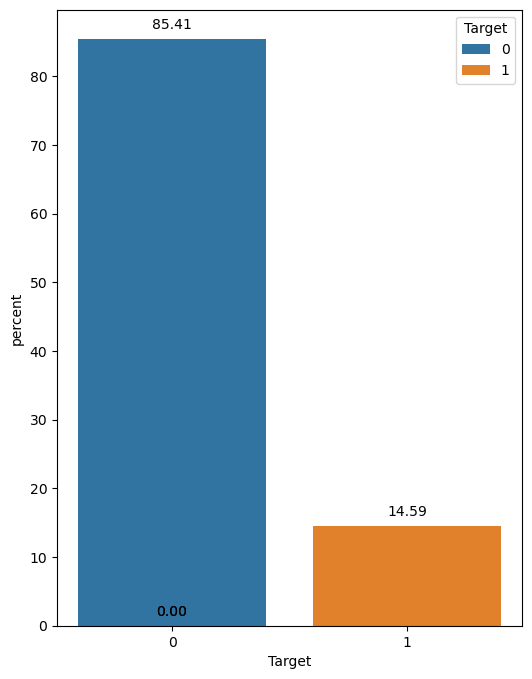

In [ ]:
plt.figure(figsize=(6, 8))
splot= sns.countplot(data=loan_df_defaulters, x="Target", hue="Target", stat="percent", legend="full")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    #temp_height = p.get_height()
                
                #if math.isnan(temp_height):
                    #temp_height = 0.01
    #splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')                
                
    #ax.annotate('{:1.1f}%'.format((temp_height*100)/float(len(loan_df_defaulters))), (p.get_x()+0.05, temp_height+20))  
plt.plot()

Analysis -  14.59% percent are defaulters

### Univariate Numerical Analysis

### Checking Outliers

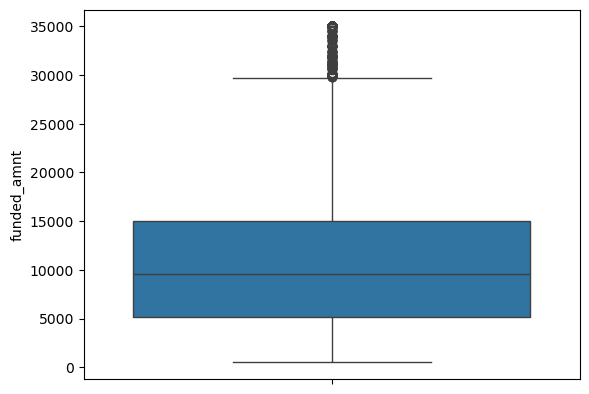

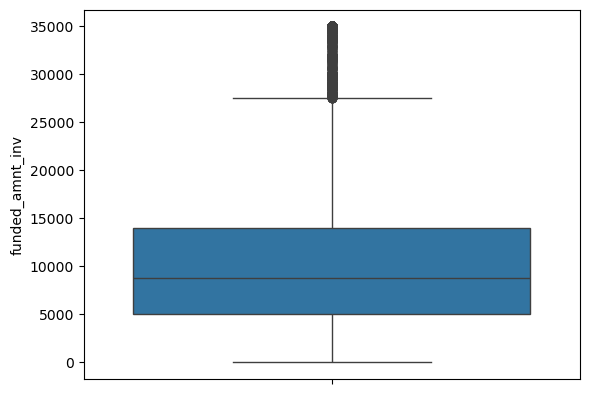

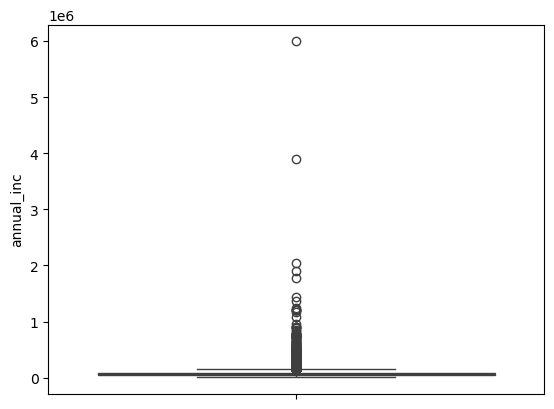

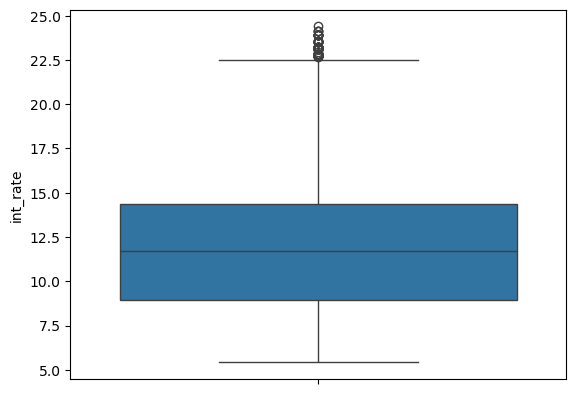

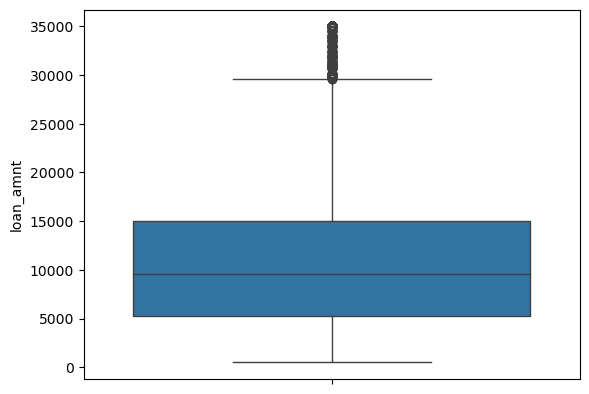

In [ ]:
for i in num_col:
    sns.boxplot(loan_df_defaulters[i])
    plt.show()

* This show annual_inc many outliers. We need to remove outliers

In [ ]:
q = loan_df_defaulters["annual_inc"].apply(lambda x: float(x)).quantile(0.93)
loan_df_defaulters = loan_df_defaulters[loan_df_defaulters["annual_inc"].apply(lambda x: float(x)) < q]
loan_df_defaulters["annual_inc"].describe()

count     35874.000000
mean      59263.024615
std       25830.876993
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      127404.000000
Name: annual_inc, dtype: float64

In [ ]:
loan_df_defaulters.term.describe()

count    35874.000000
mean        41.814350
std         10.283029
min         36.000000
25%         36.000000
50%         36.000000
75%         36.000000
max         60.000000
Name: term, dtype: float64

<Axes: >

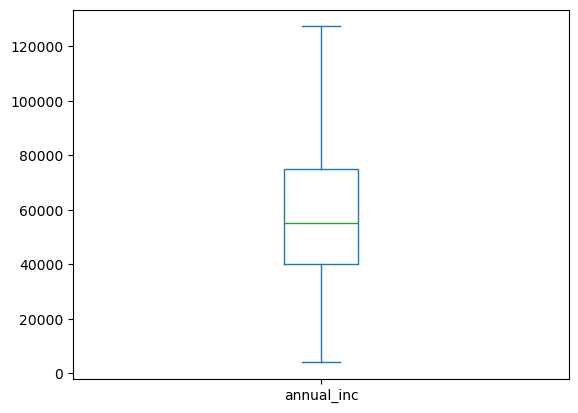

In [ ]:
loan_df_defaulters.annual_inc.plot(kind="box")

### Multivariate Analysis - Correlation between Numerical Columns

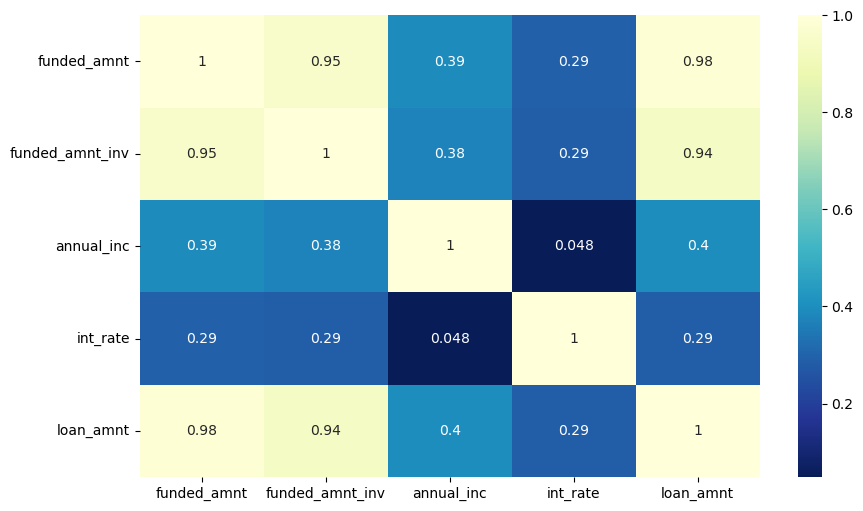

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(loan_df_defaulters[num_col].corr(),annot=True,cmap="YlGnBu_r")
plt.show()

Analysis :- Correlation between fund_amt and fund_amt_inv is almost same as Loan Amount w.r.t Annual Income, We can drop fund_amt and fund_amt_inv

In [ ]:
# Let check annual income high on which bucket
# for i in  num_col:
#     plt.figure(figsize=(10,10))
#     g =sns.displot(loan_df[i], bins = 100, color="g")
#     plt.ticklabel_format(style='plain')
#     g.set_xticklabels(rotation=30)
#     plt.title("Distribution of " + i)
    
#     plt.show()

In [ ]:
cols1 = ["funded_amnt","funded_amnt_inv"]
loan_df1 =loan_df_defaulters.drop(cols1, axis=1)

### Final Attributes for Decision Making

In [ ]:
num_col_final =  ["annual_inc", "int_rate", "loan_amnt"]
cat_col_final =  ["grade","sub_grade", "emp_length", "verification_status", "home_ownership", "purpose", "loan_status", "term", "Target"]

### Univariate Categorical Analysis

<Axes: xlabel='issue_year'>

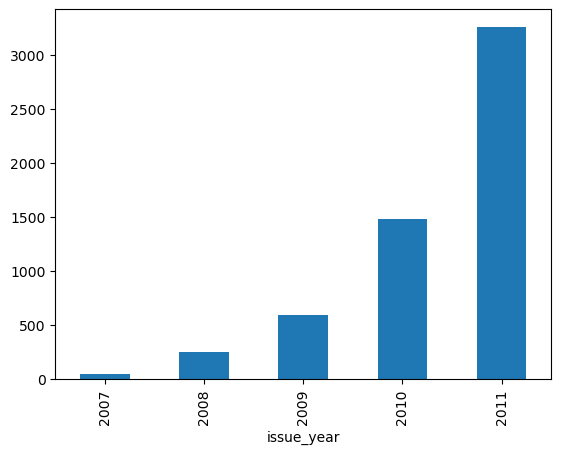

In [1813]:
# considering one categorical variable  here as Year and using aggregation function called Count
#plot_issue_year = loan_df.groupby("issue_year").frequency.count().reset_index()
#plot_bar_chat(plot_issue_year,"issue_year","frequency")
loan_df_defaulters.issue_year.unique()
loan_df_defaulters1 =loan_df_defaulters[loan_df_defaulters.loan_status == "Charged Off"]
loan_df_defaulters1.groupby(["issue_year"]).loan_status.count().plot(kind="bar")

### Univariate Segmented Analysis

In [ ]:
#### This is indirectly pivot function of calling group by in terms of count plot, I would ignore bar plot here as i dont need sum, max, mean, mode across loan amount, I just need grouby category segmentation
####  to analyse defaulters/Non Defaulters across each segment of categorical columns
####   cat_col =  ["grade","sub_grade", "emp_length", "verification_status", "home_ownership", "purpose", "loan_status"]
#sns.color_palette()
def plot_group_bar_chart(dataset,col,hue): 
    hue_col = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(dataset[col].unique()) + 6 + 5*len(hue_col.unique())
    fig.set_size_inches(width , 10)
    ax = sns.countplot(data = dataset, x= col,  order=dataset[col].value_counts().index,hue = hue,palette="pastel")
    
    for p in ax.patches:
                # Some segment wise value we are getting as Nan as respective value not present to tackle the Nan using temp_height
                temp_height = p.get_height()
                
                #if math.isnan(temp_height):
                    #temp_height = 0.01
                    
                
                ax.annotate('{:1.1f}%'.format((temp_height*100)/float(len(dataset))), (p.get_x()+0.05, temp_height+20))  
    plt.show()

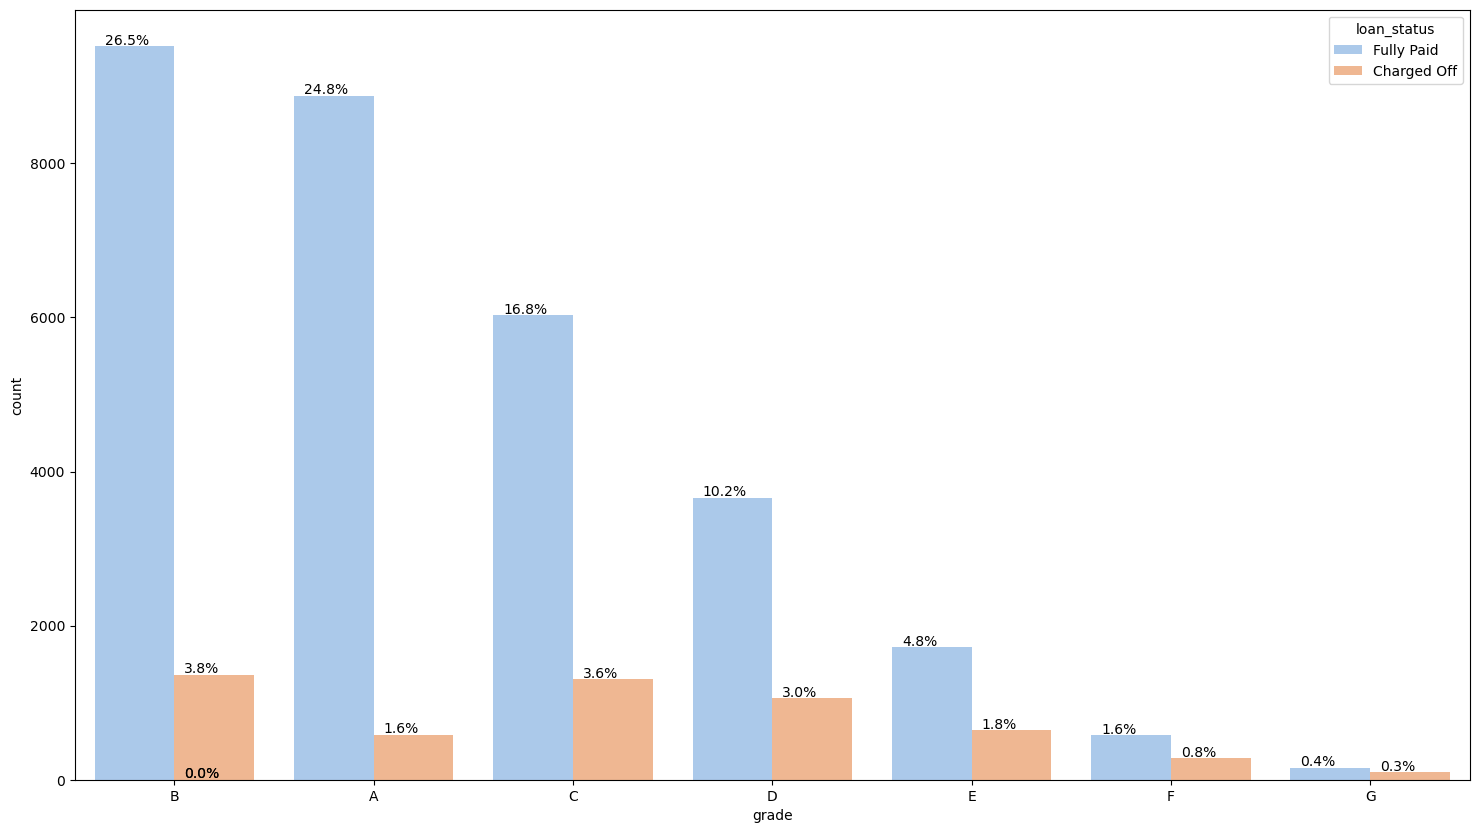

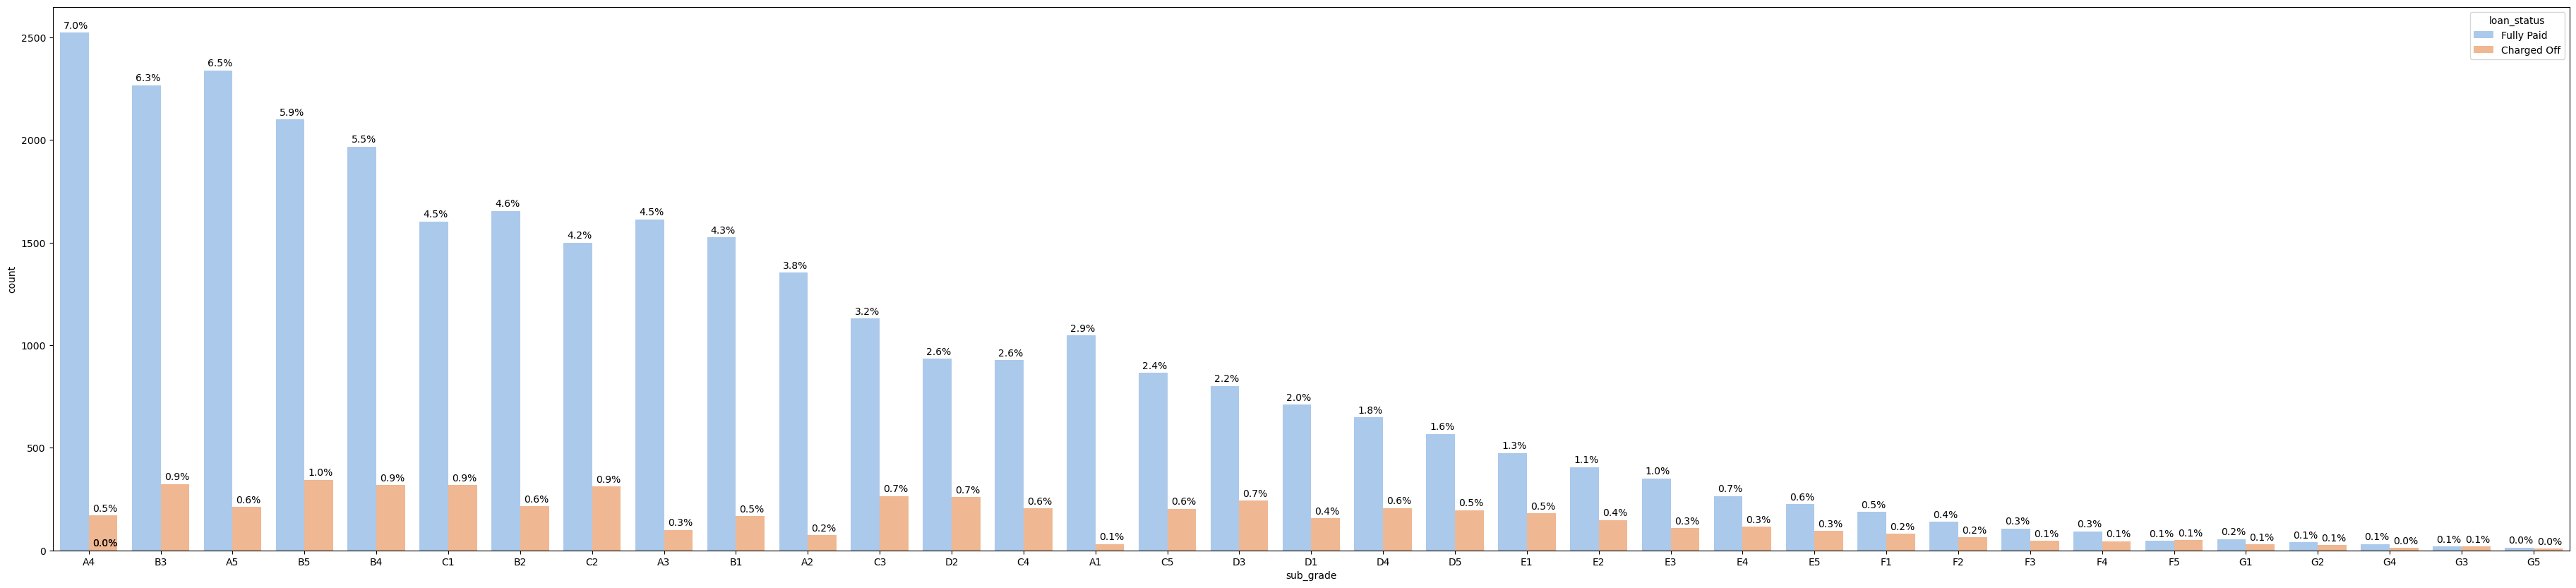

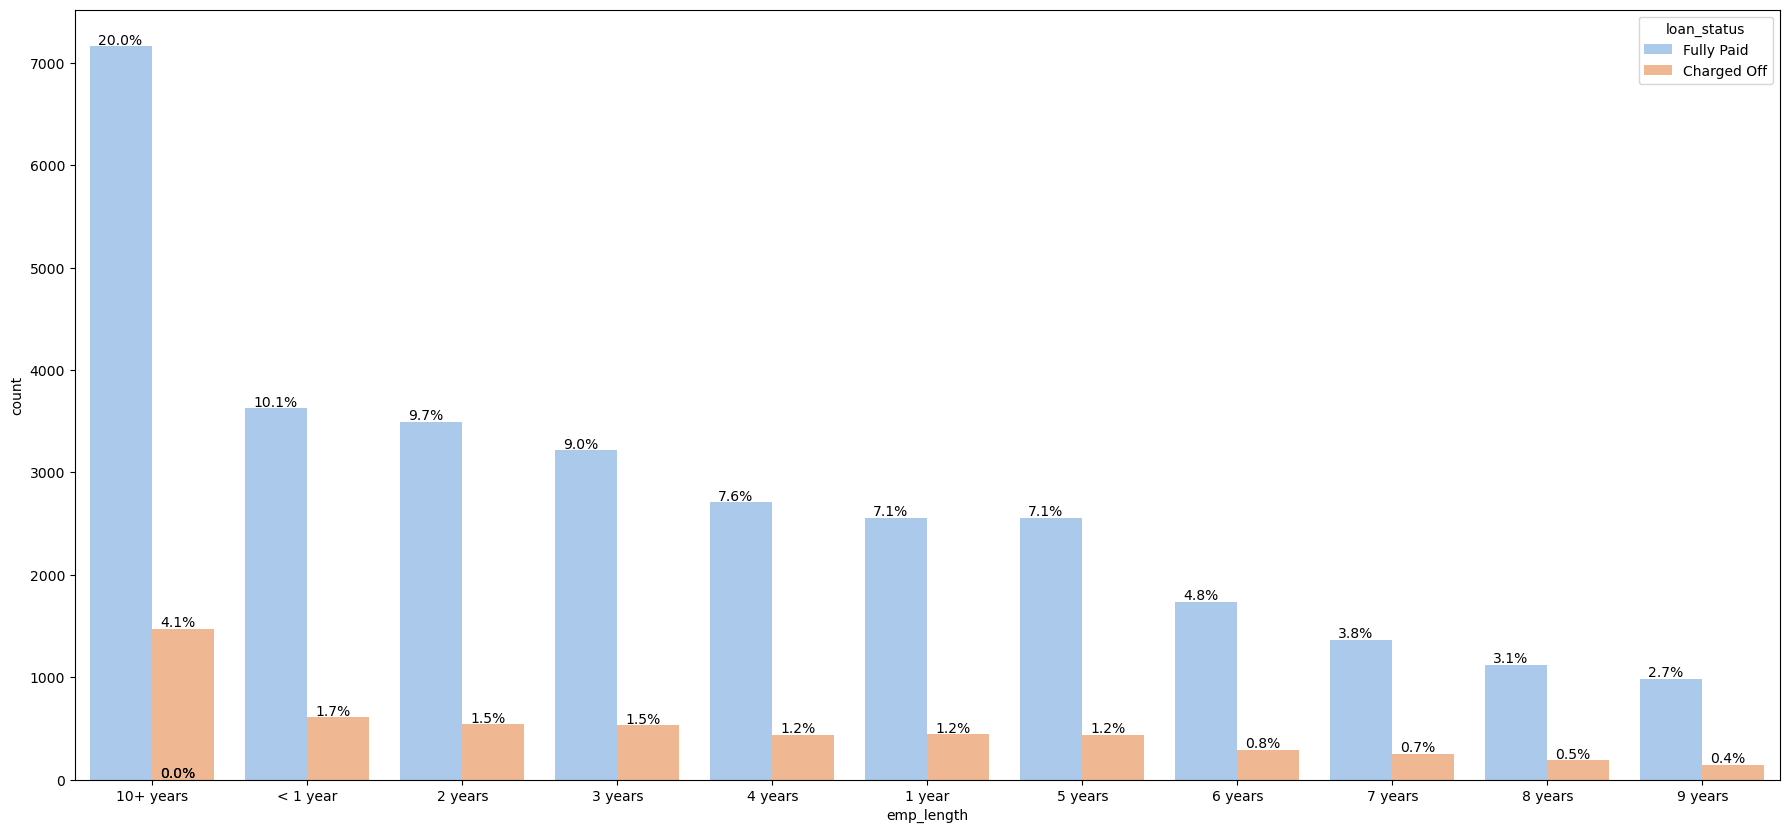

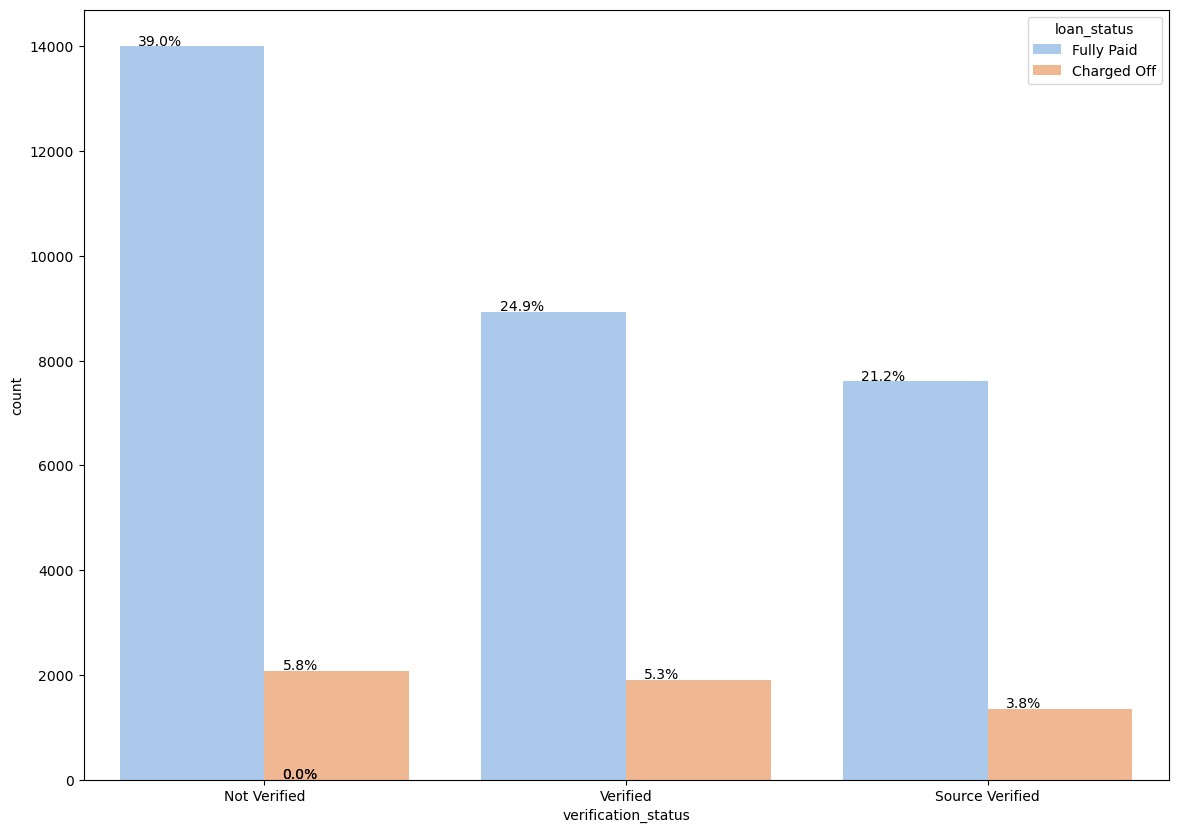

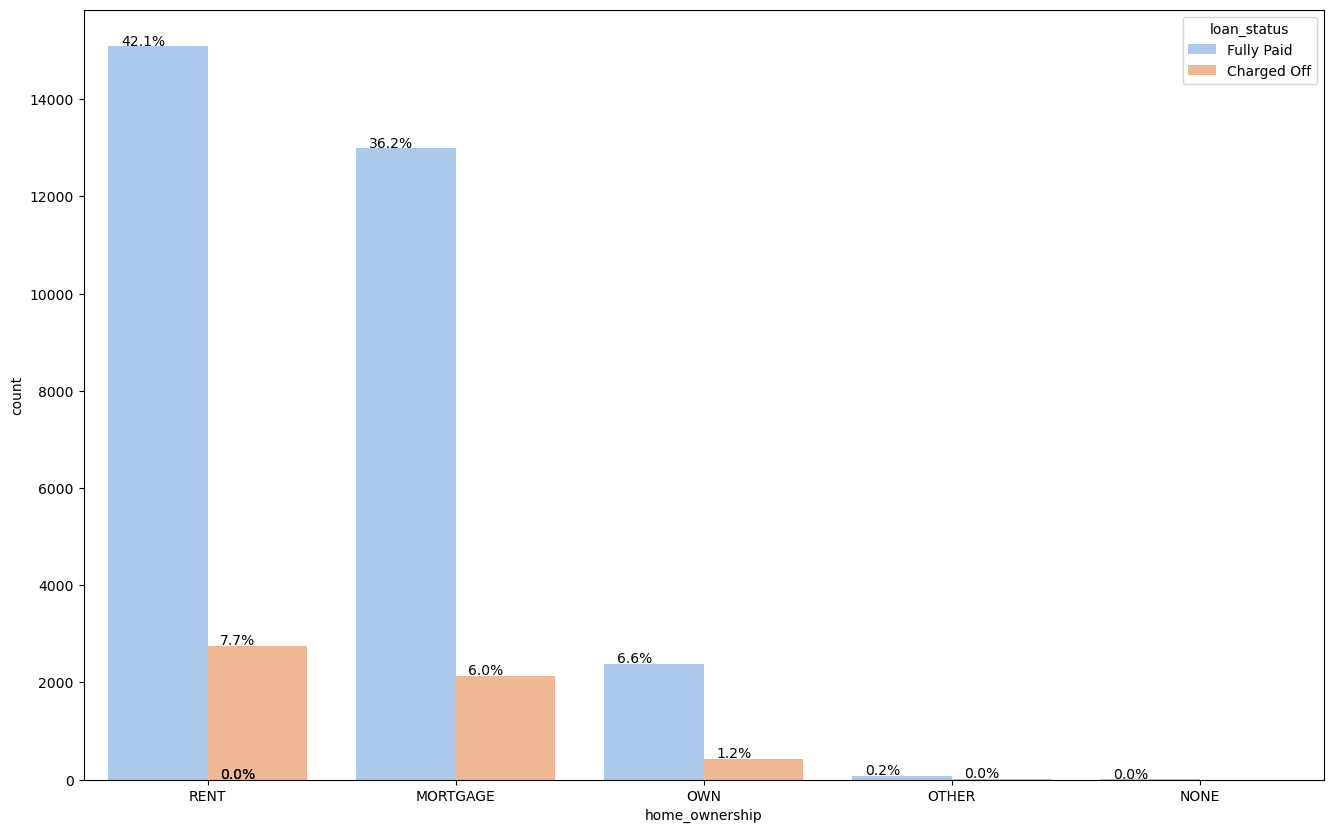

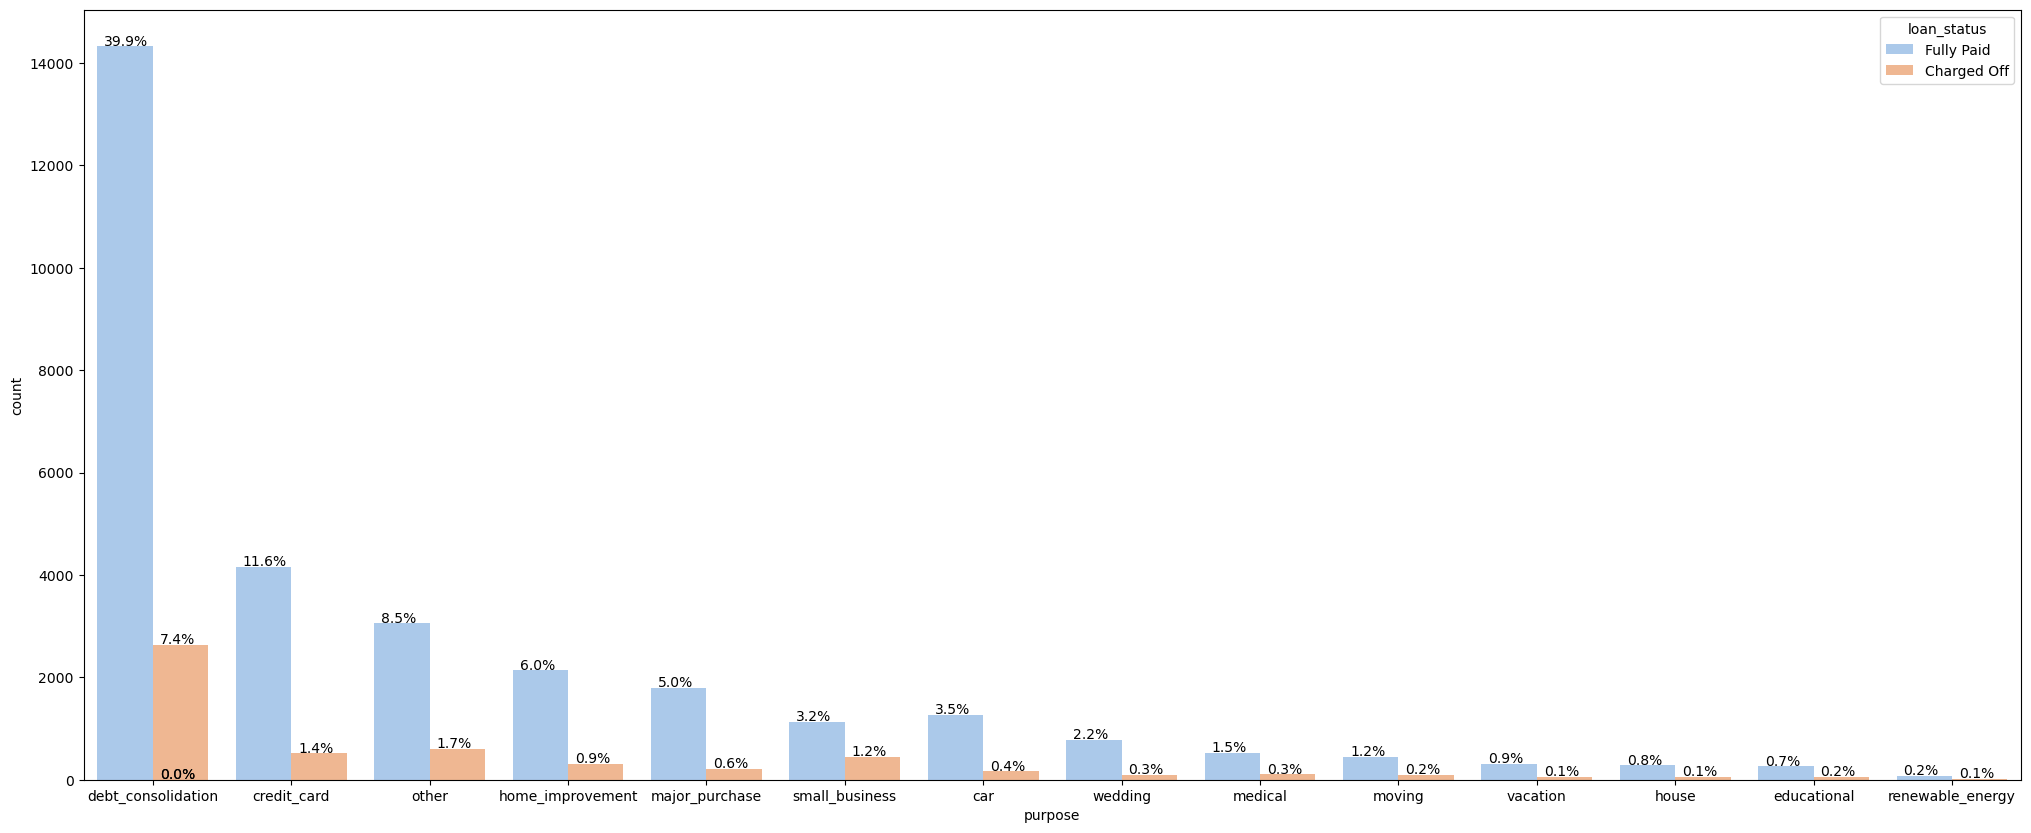

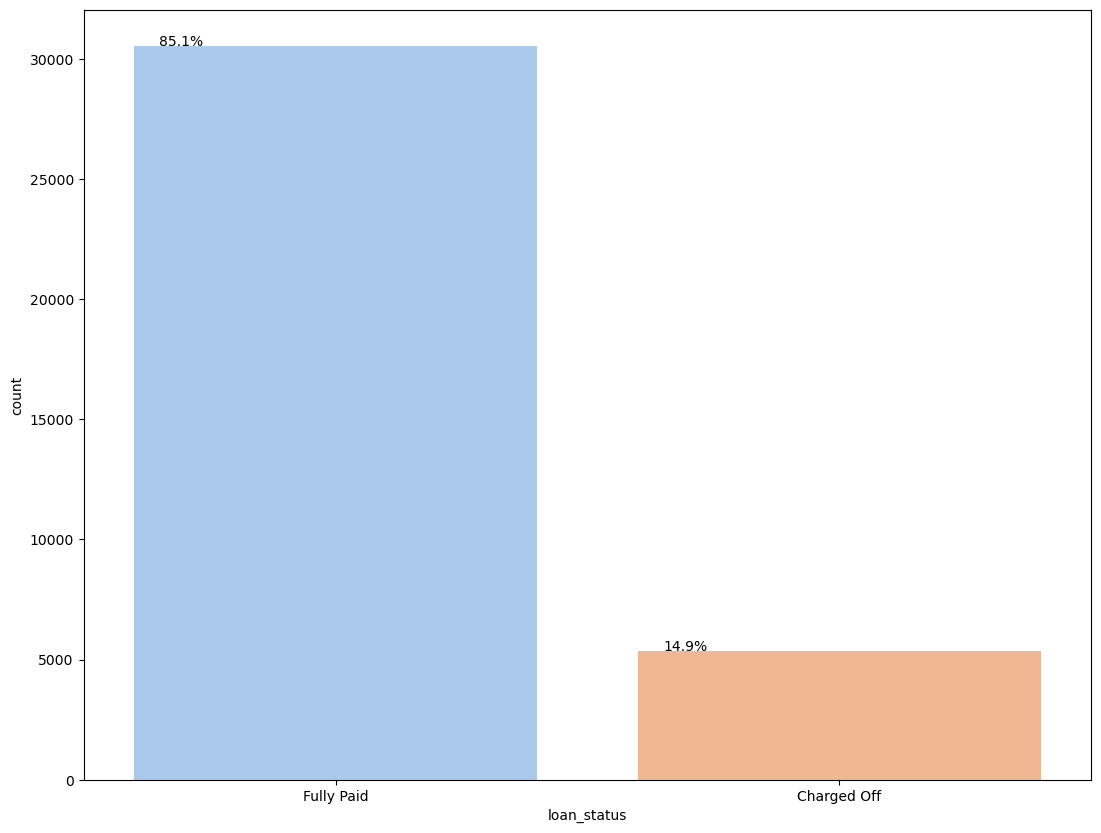

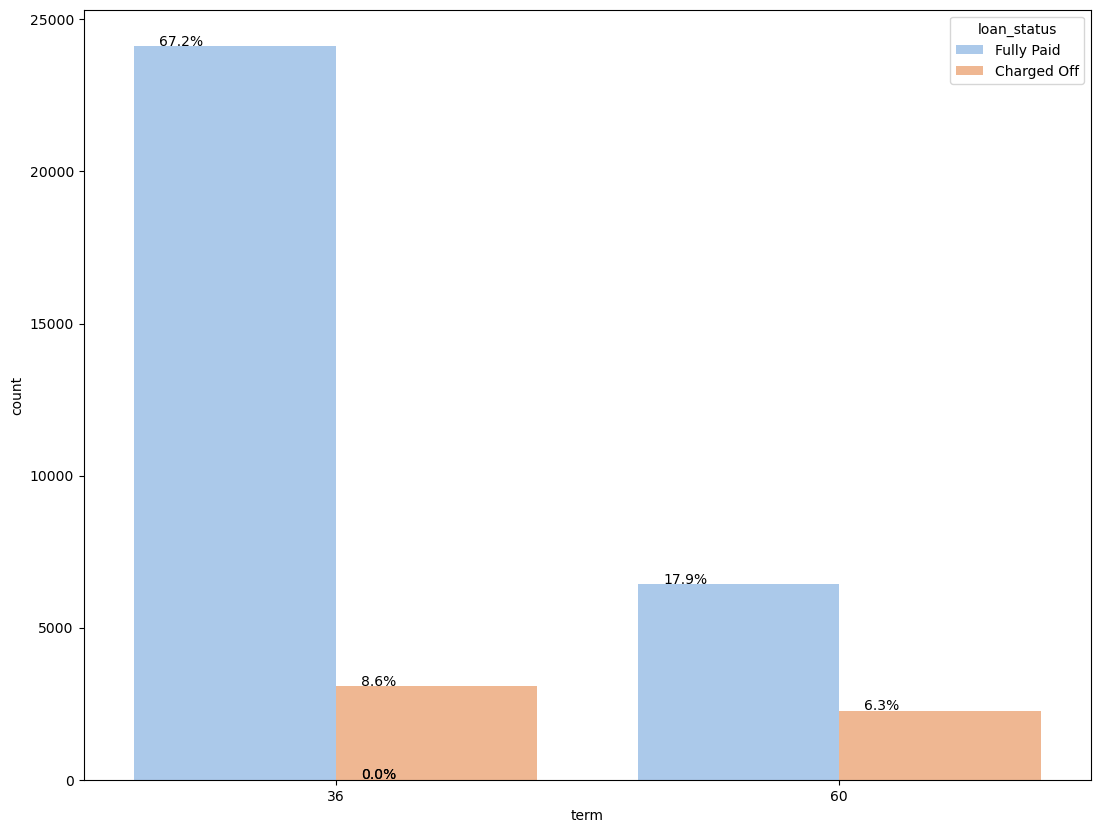

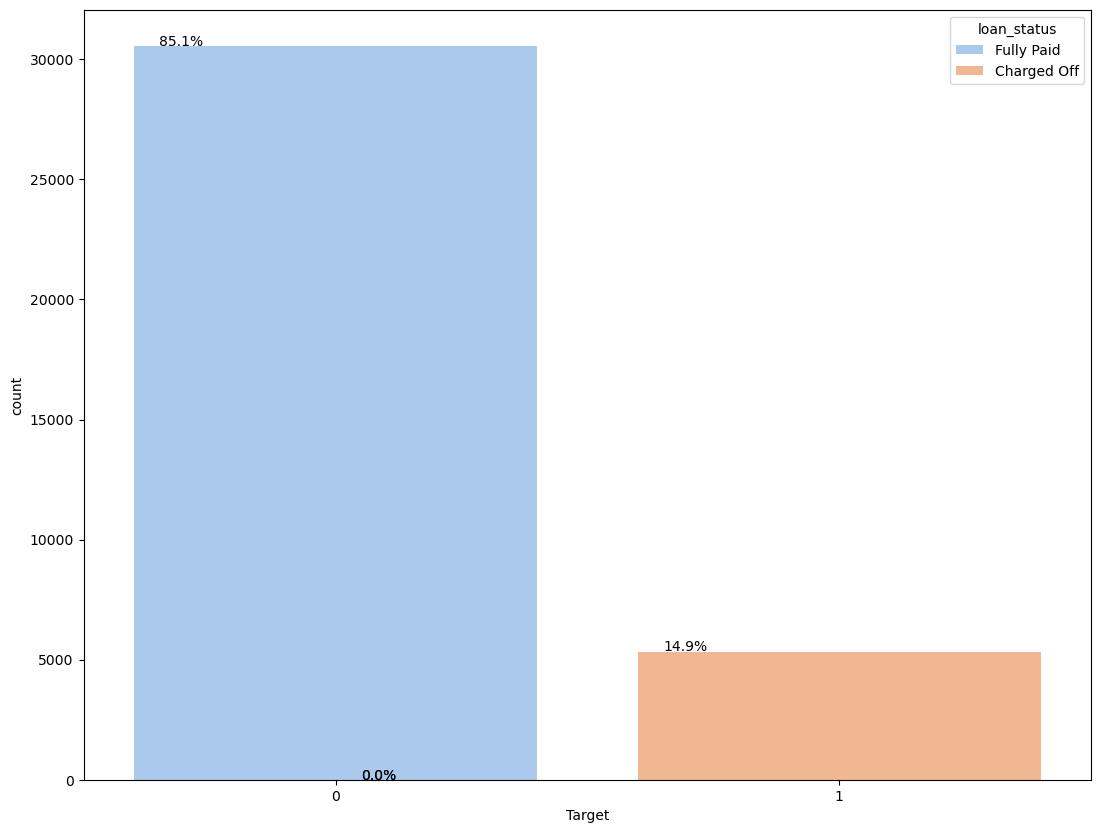

In [ ]:
for i in cat_col_final:
    plot_group_bar_chart(loan_df_defaulters,i, "loan_status")   

Analysis:
* 
* 
* 
* 
* 


### Bivariate Numerical Columns

[]

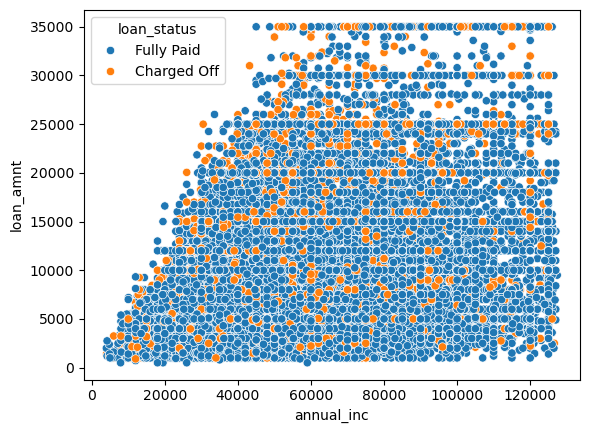

In [ ]:
sns.scatterplot(x="annual_inc", y="loan_amnt", hue="loan_status", data=loan_df_defaulters)
plt.plot()

[]

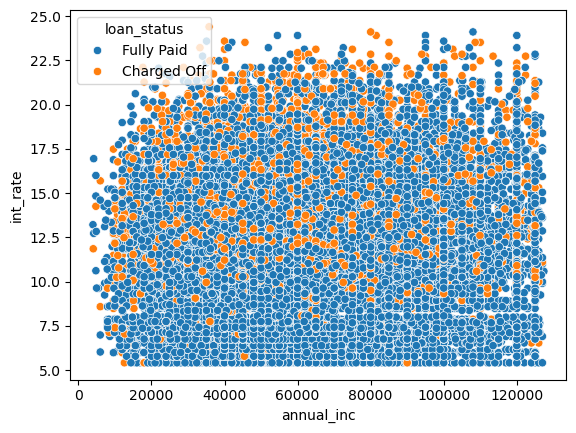

In [ ]:
sns.scatterplot(x="annual_inc", y="int_rate", hue="loan_status", data=loan_df_defaulters)
plt.plot()

Analysis
* 
* 
* 


###  Bivariate Categorical Columns

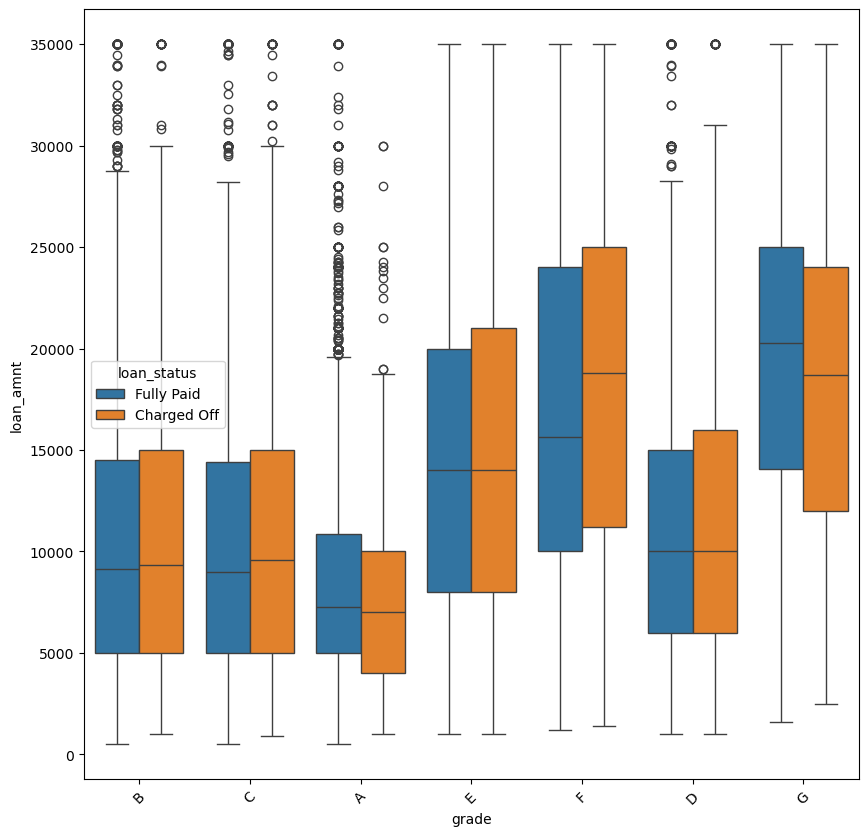

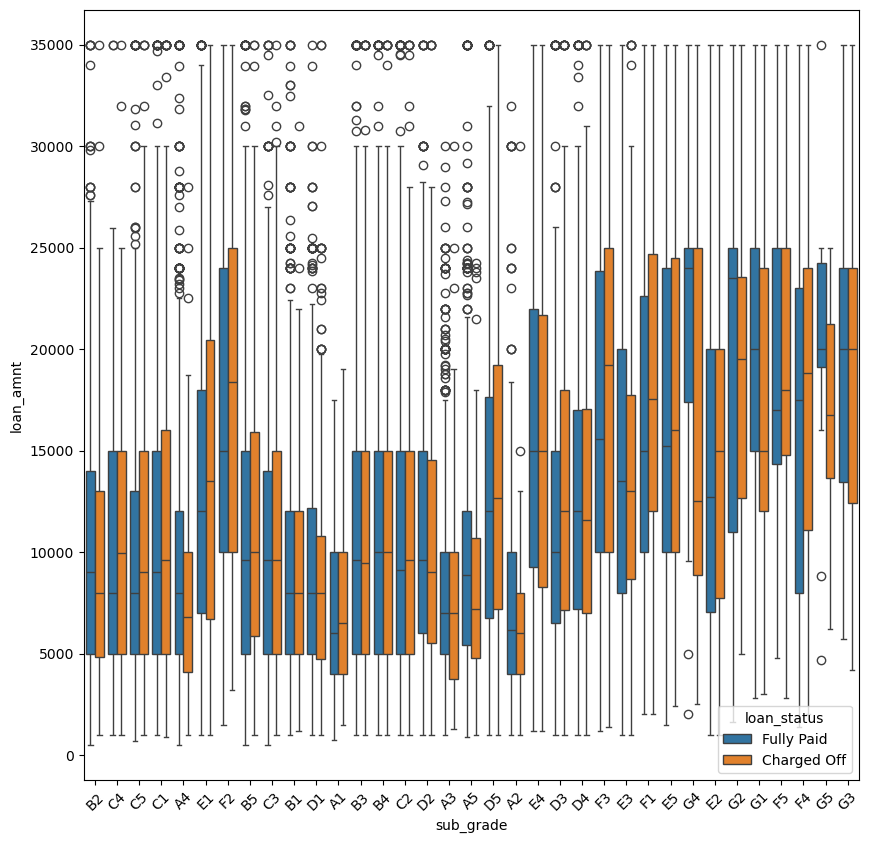

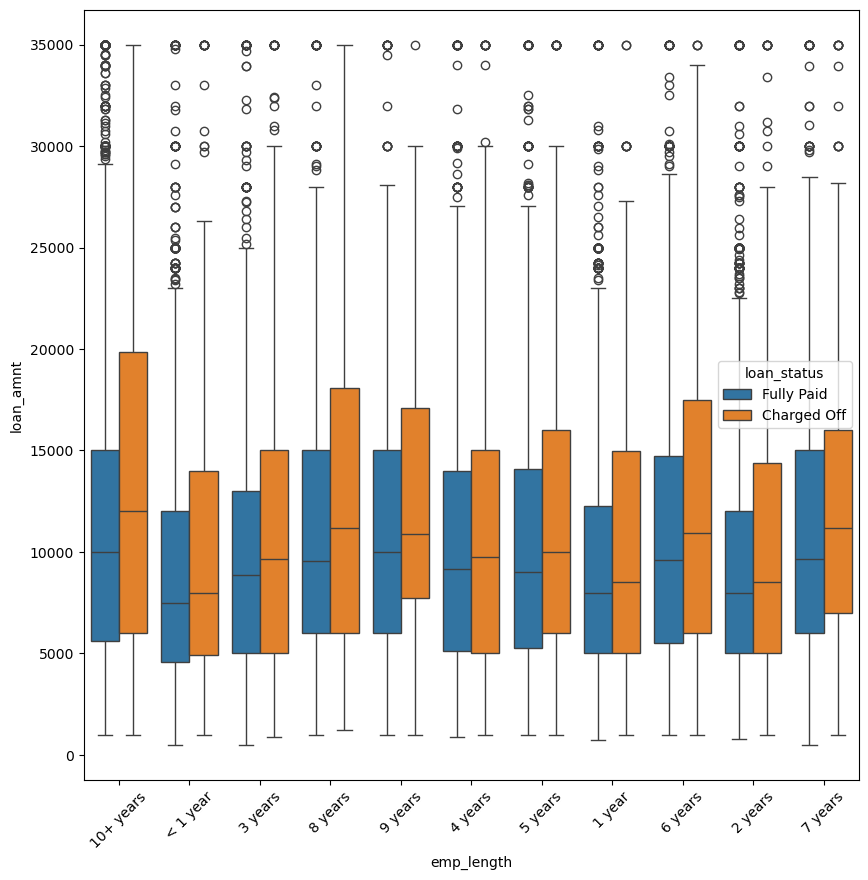

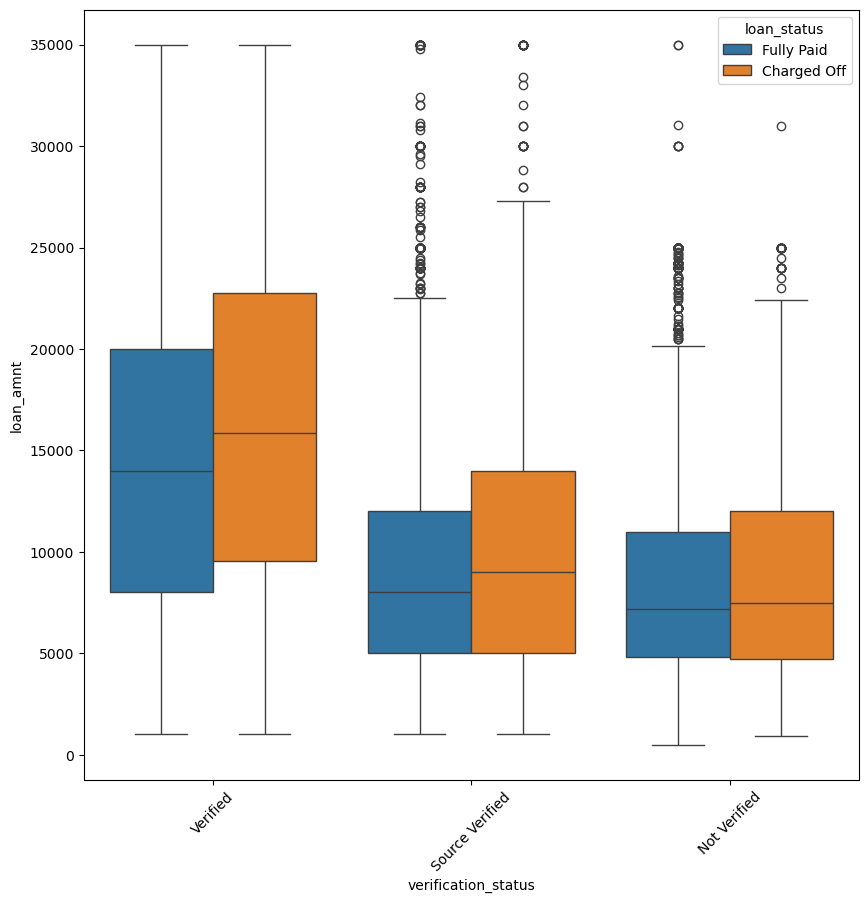

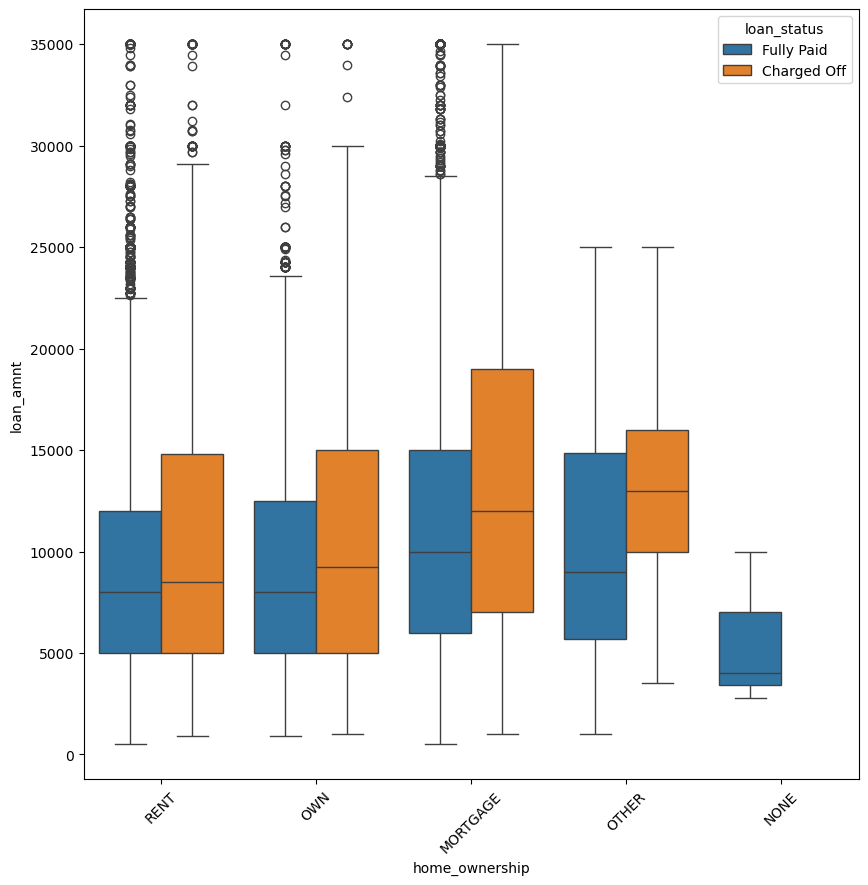

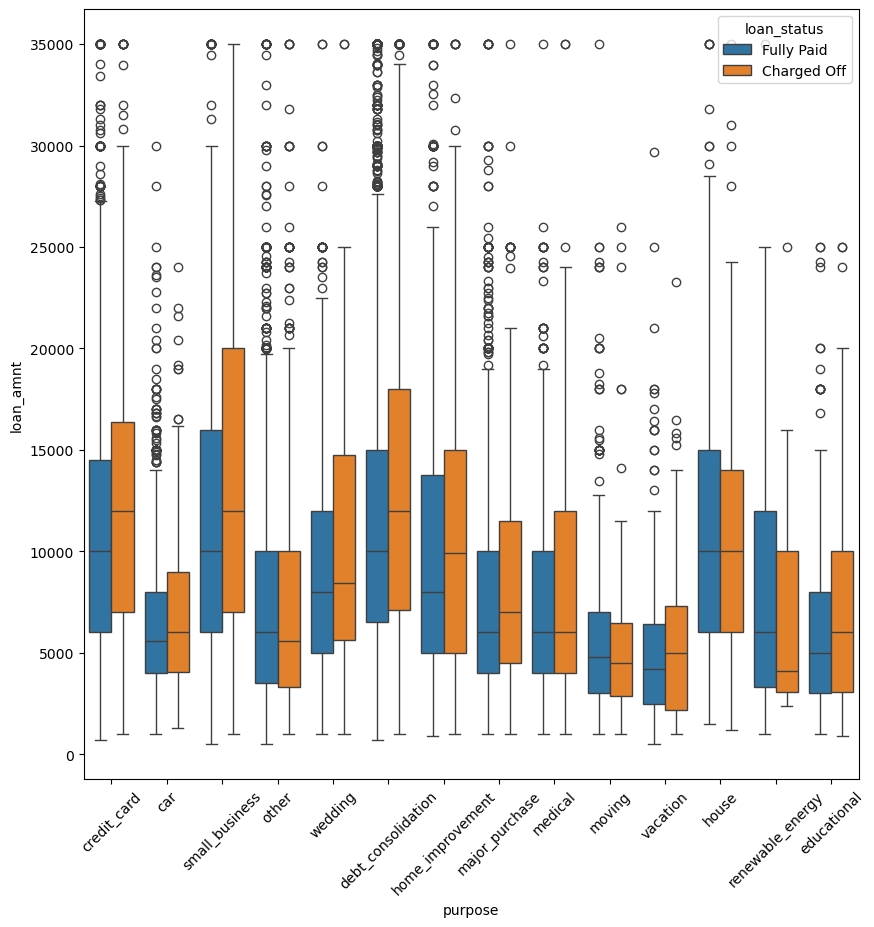

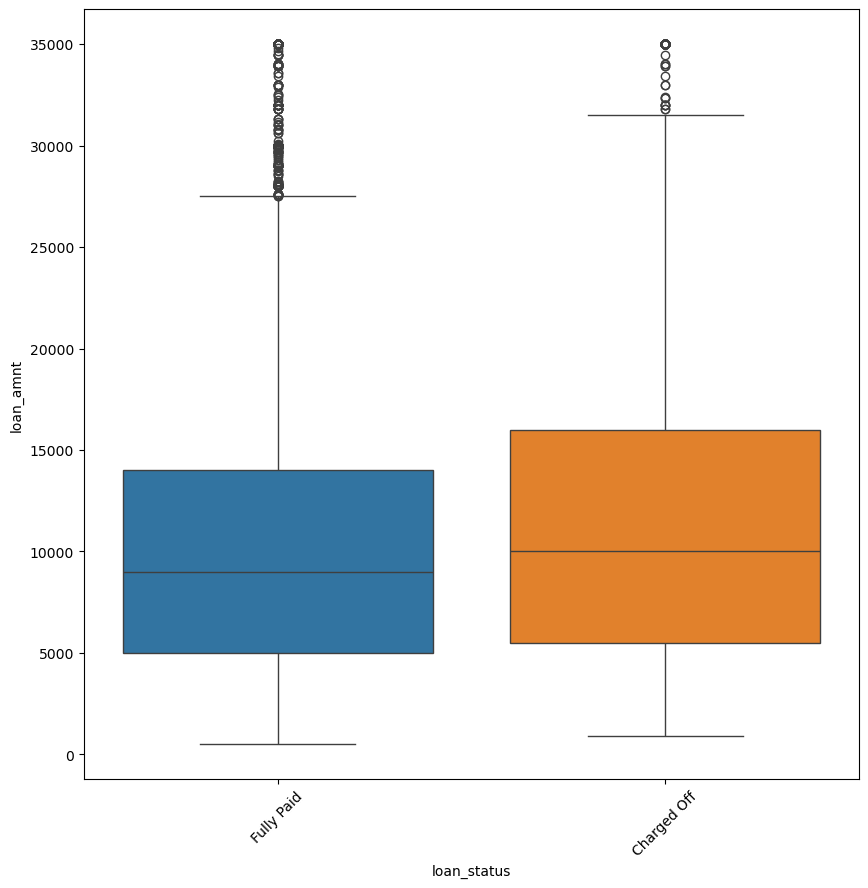

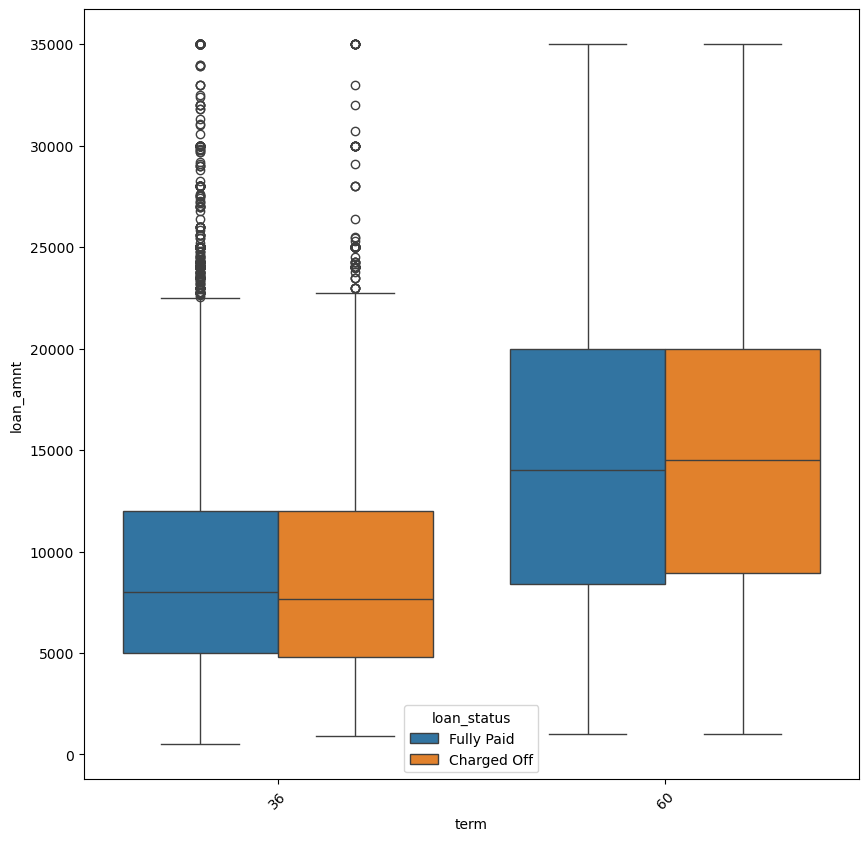

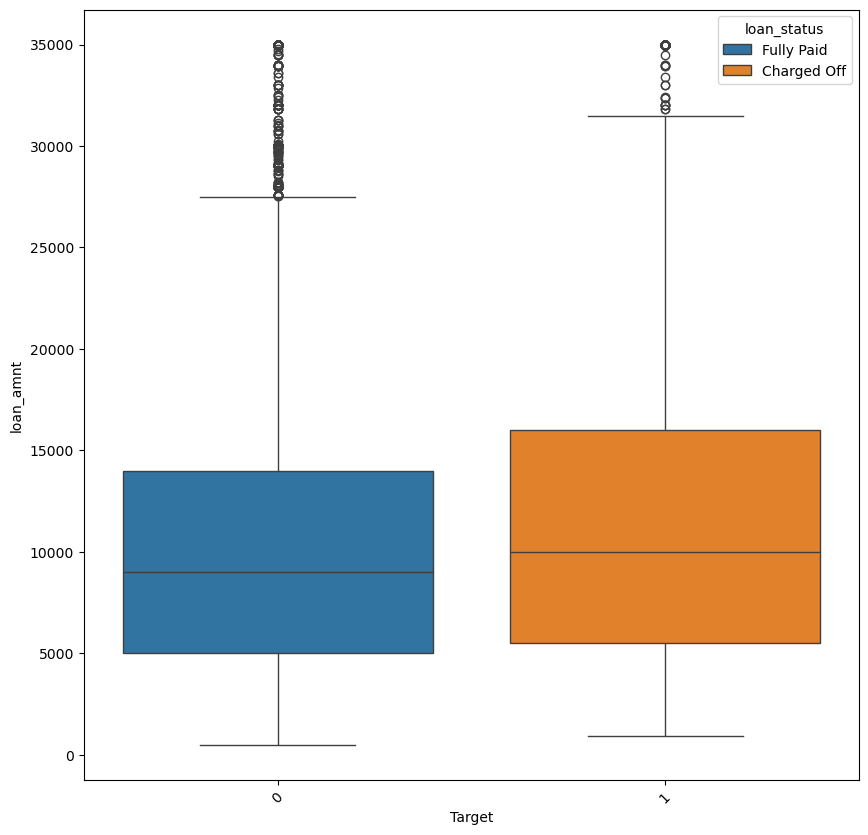

In [ ]:
# # Employment Length vs Loan Amount for different pupose of Loan

# loanstatus=loan_df.pivot_table(index=['loan_status','purpose','emp_length'],values='loan_amnt',aggfunc=('count')).reset_index()
# loanstatus=loan_df.loc[loan_df['loan_status']=='Charged Off']

# ax = plt.figure(figsize=(35, 18))
# ax = sns.boxplot(x='emp_length',y='loan_amnt',hue='purpose',data=loanstatus)
# ax.set_title('Employment Length vs Loan Amount for different pupose of Loan',fontsize=22,weight="bold")
# ax.set_xlabel('Employment Length',fontsize=16)
# ax.set_ylabel('Loan Amount',color = 'b',fontsize=16)
# plt.show()
#loan_df_defaulters1 =  loan_df_defaulters[loan_df_defaulters.loan_status == "Charged Off"]
for i in cat_col_final:
    plt.figure(figsize=(10,10))
    b = sns.boxplot(data =loan_df_defaulters, y='loan_amnt', x=i, hue ='loan_status')
    #rotate x-axis labels
    b.set_xticklabels(b.get_xticklabels(), rotation=45)
    

Analysis:-
* 
* 
* 
* 

### Probability of Defaulting

loan_status,Charged Off,Fully Paid,All,Loan Default Probability
grade,,,,
A,586,8879,9465,0.062
B,1364,9518,10882,0.125
C,1301,6027,7328,0.178
D,1061,3662,4723,0.225
E,646,1722,2368,0.273
F,284,574,858,0.331
G,94,156,250,0.376


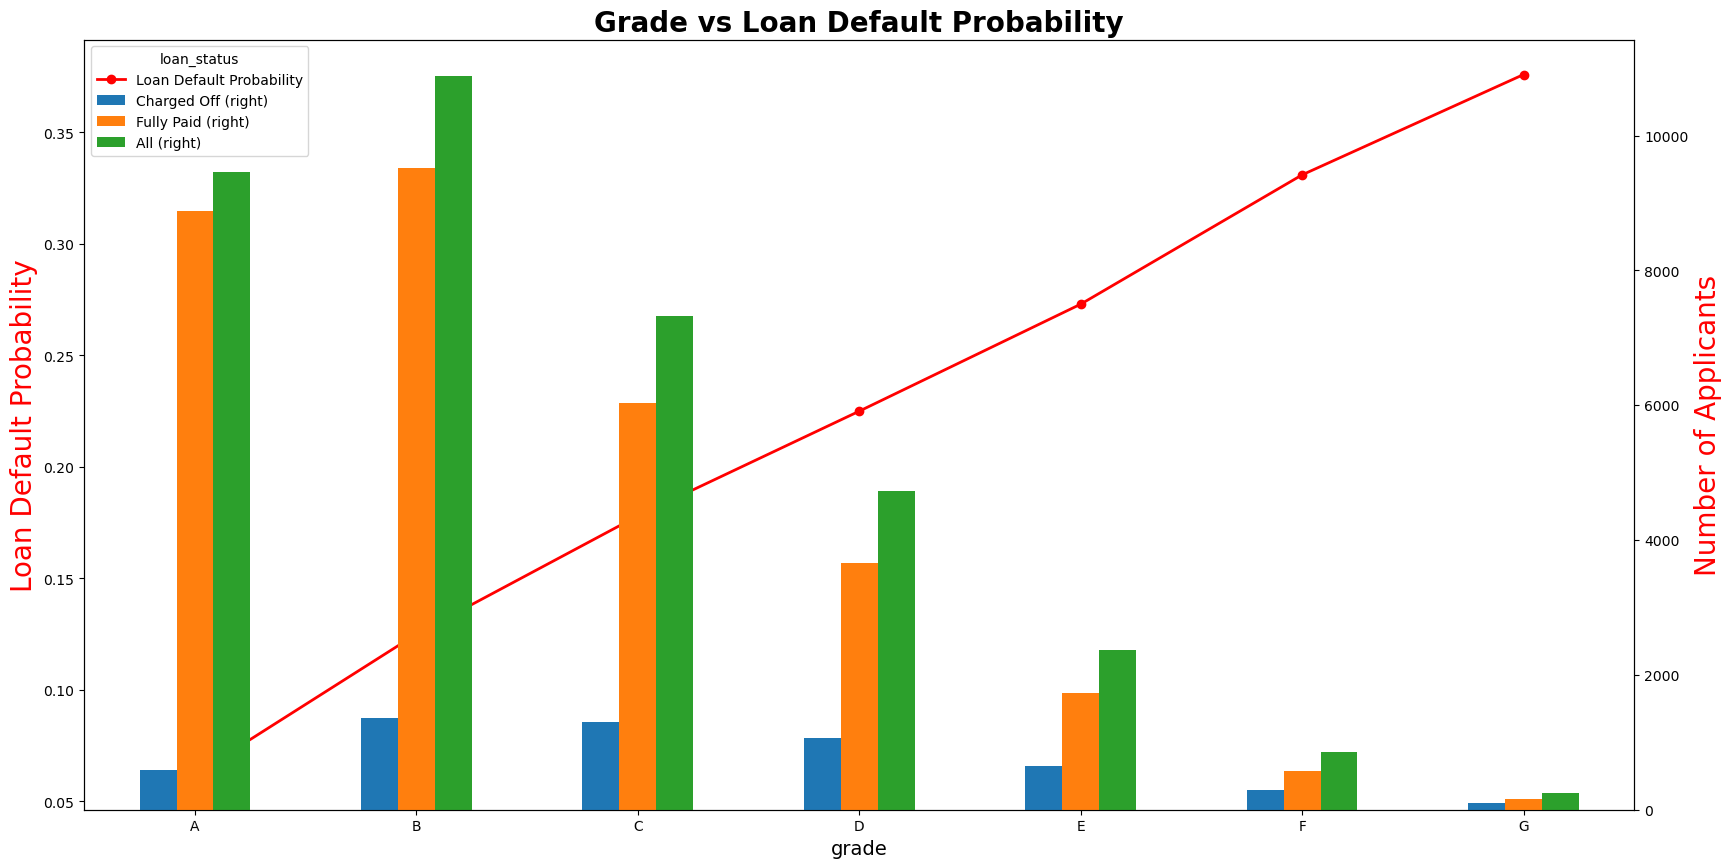

loan_status,Charged Off,Fully Paid,All,Loan Default Probability
sub_grade,,,,
A1,30,1047,1077,0.028
A2,74,1354,1428,0.052
A3,100,1614,1714,0.058
A4,171,2524,2695,0.063
A5,211,2340,2551,0.083
B1,166,1526,1692,0.098
B2,214,1655,1869,0.114
B3,323,2268,2591,0.125
B4,317,1968,2285,0.139


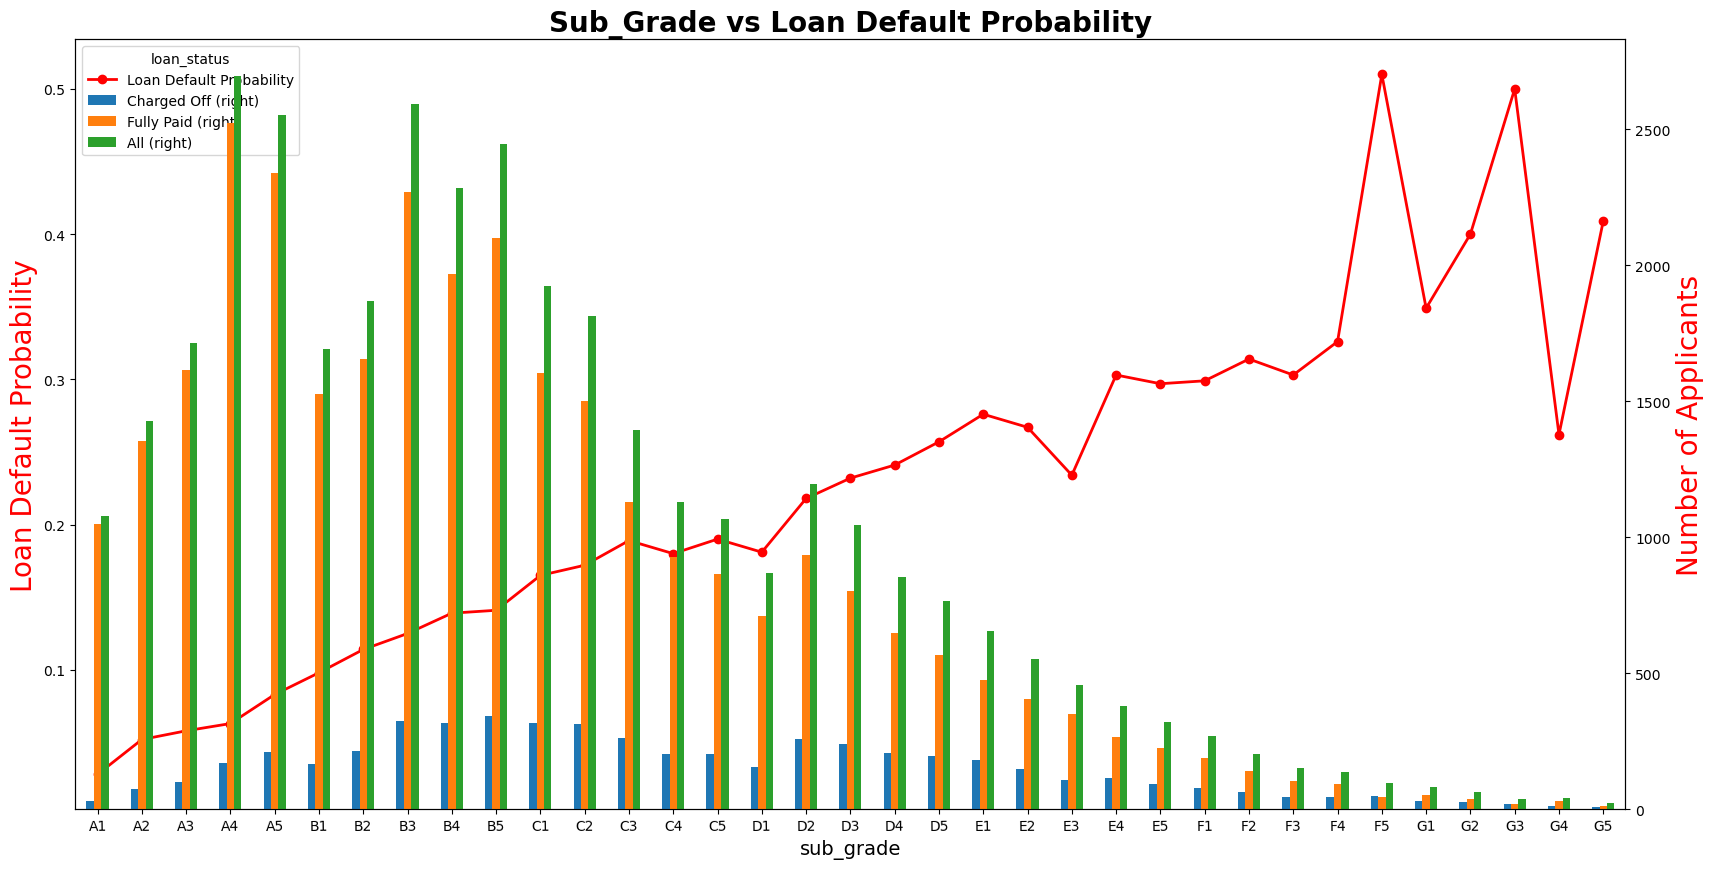

loan_status,Charged Off,Fully Paid,All,Loan Default Probability
emp_length,,,,
1 year,442,2558,3000,0.147
10+ years,1471,7163,8634,0.170
2 years,540,3495,4035,0.134
3 years,530,3216,3746,0.141
4 years,437,2710,3147,0.139
5 years,436,2557,2993,0.146
6 years,290,1739,2029,0.143
7 years,249,1366,1615,0.154
8 years,187,1124,1311,0.143


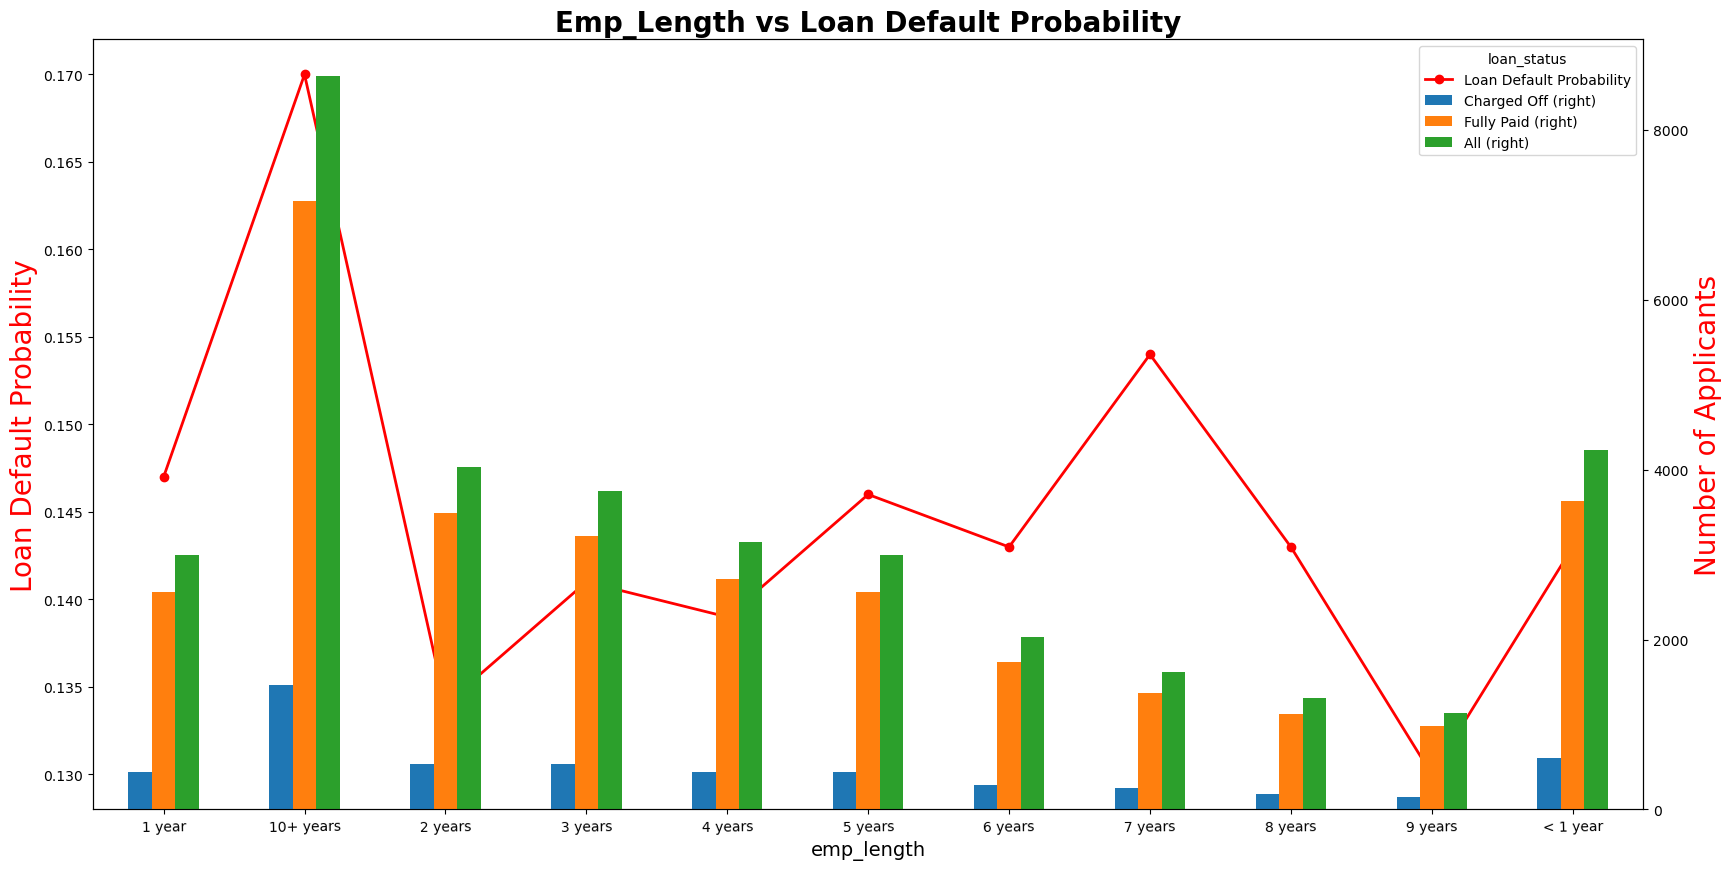

loan_status,Charged Off,Fully Paid,All,Loan Default Probability
verification_status,,,,
Not Verified,2077,14003,16080,0.129
Source Verified,1357,7606,8963,0.151
Verified,1902,8929,10831,0.176


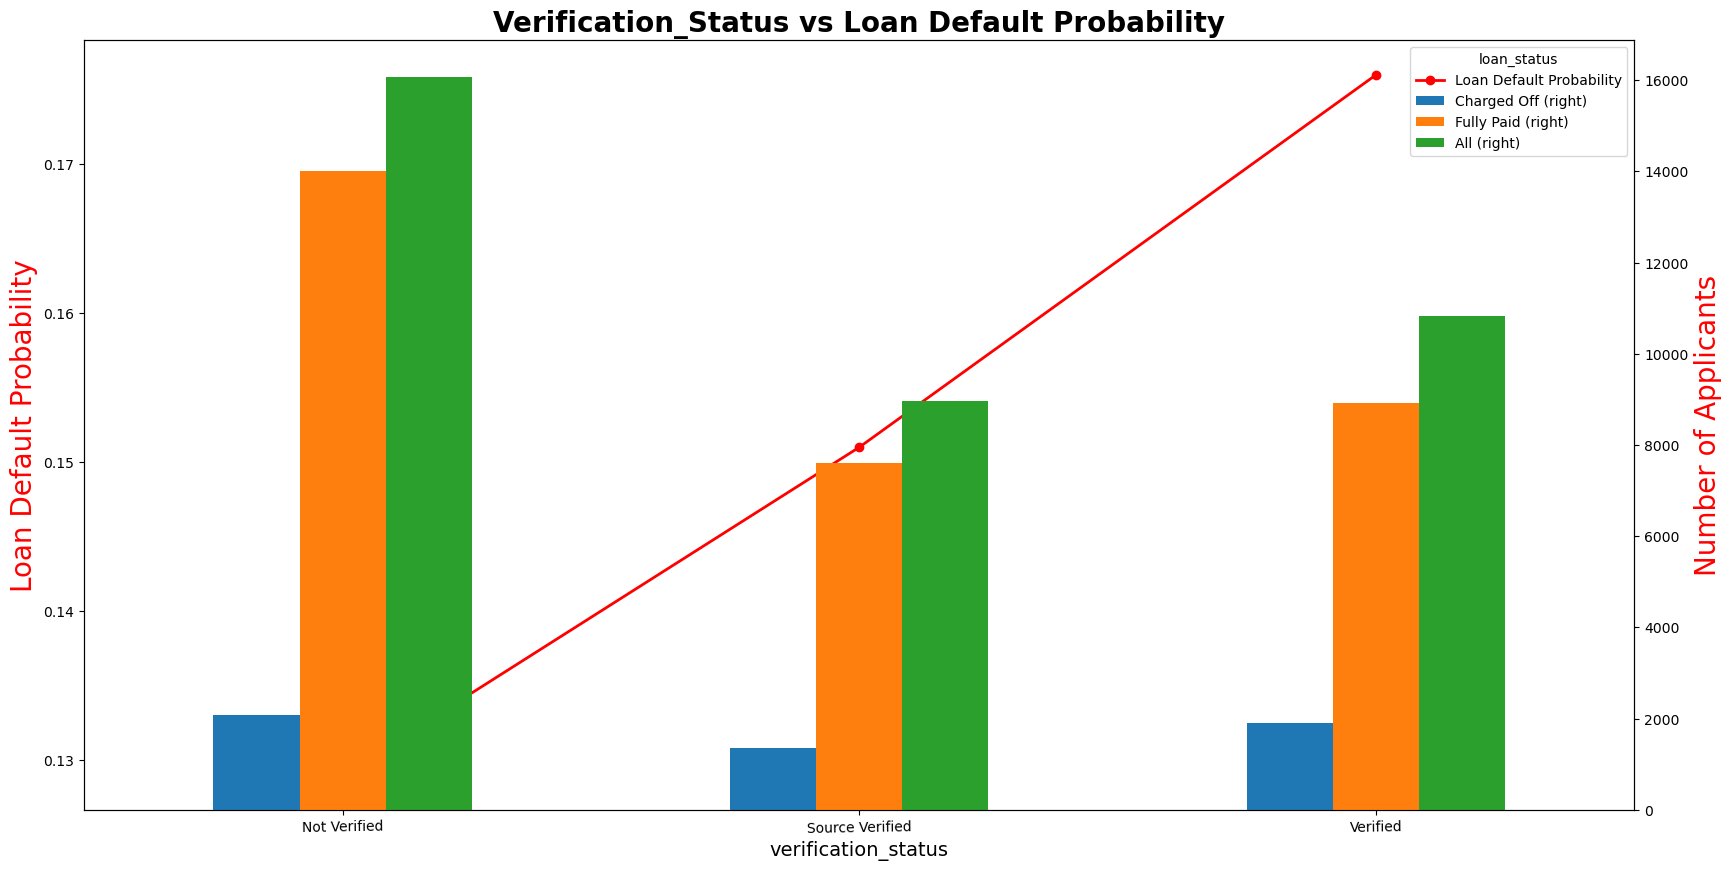

loan_status,Charged Off,Fully Paid,All,Loan Default Probability
home_ownership,,,,
MORTGAGE,2136,12987,15123,0.141
NONE,0,3,3,0.000
OTHER,17,75,92,0.185
OWN,429,2383,2812,0.153
RENT,2754,15090,17844,0.154


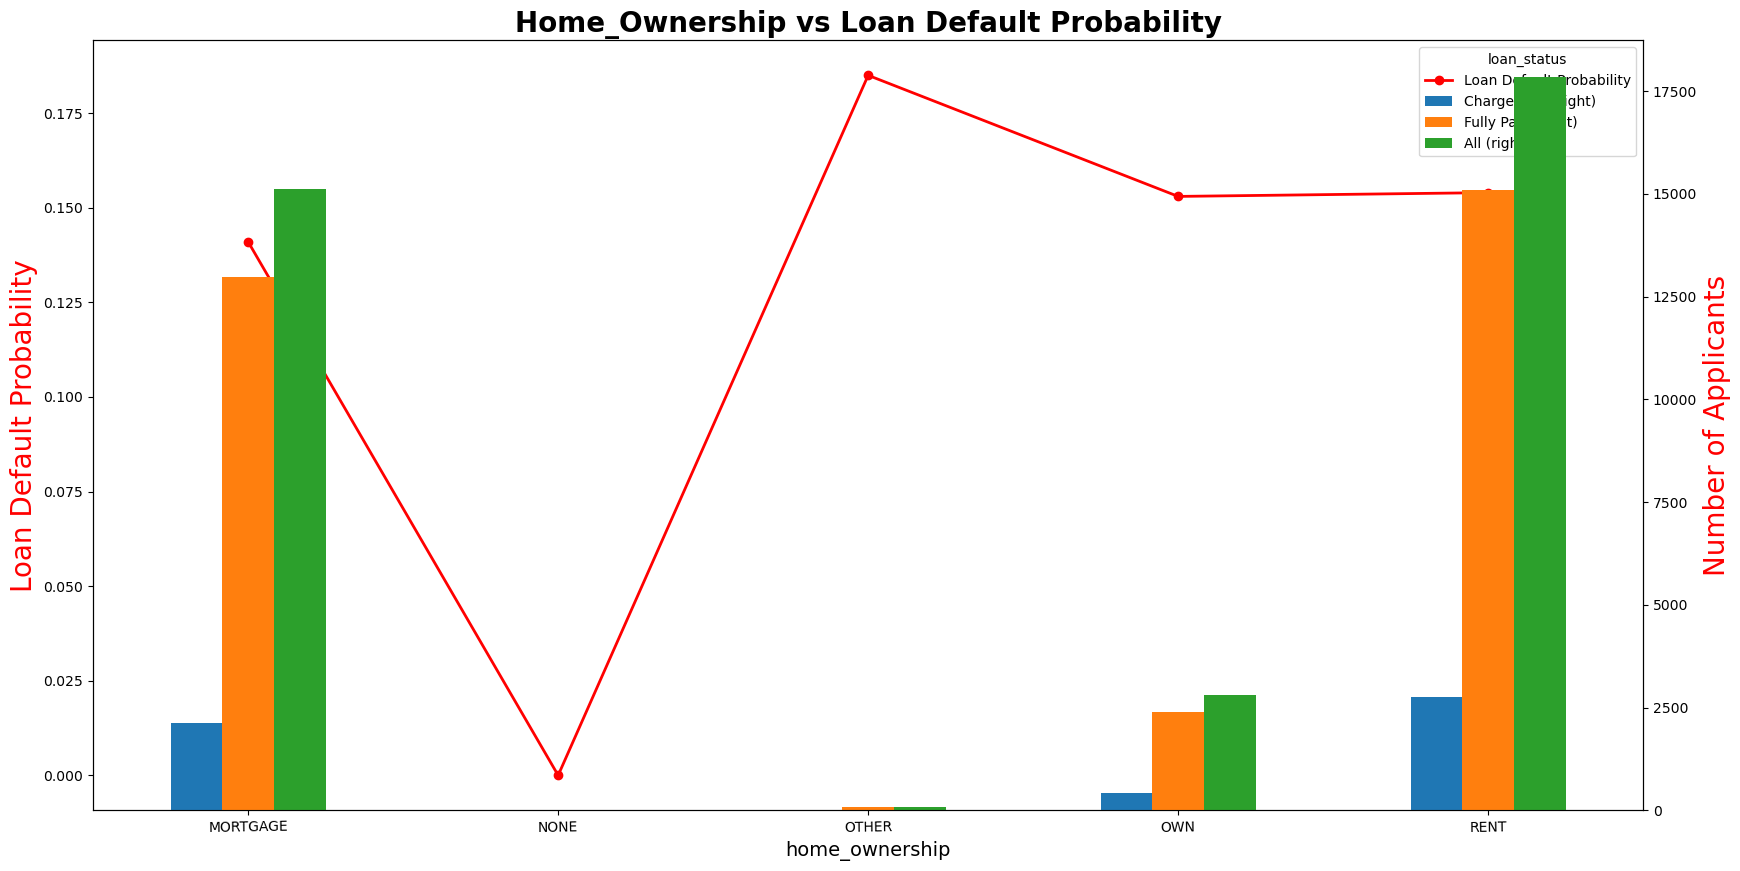

loan_status,Charged Off,Fully Paid,All,Loan Default Probability
purpose,,,,
car,158,1270,1428,0.111
credit_card,515,4155,4670,0.110
debt_consolidation,2639,14329,16968,0.156
educational,54,257,311,0.174
home_improvement,310,2139,2449,0.127
house,53,279,332,0.160
major_purchase,214,1794,2008,0.107
medical,101,526,627,0.161
moving,89,441,530,0.168


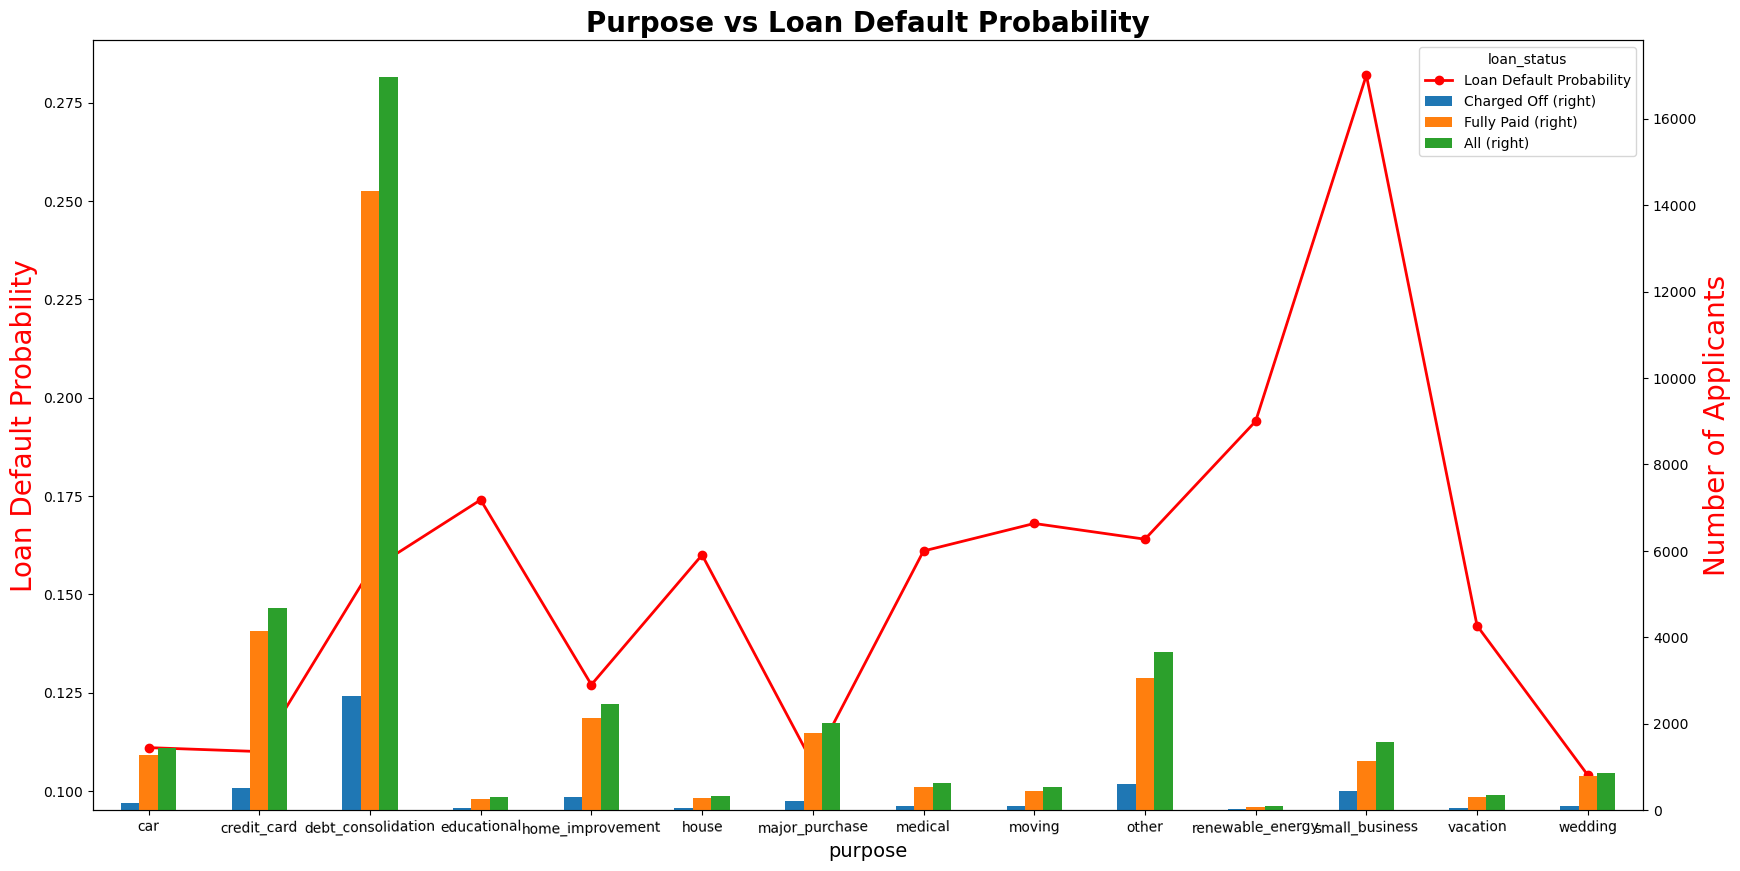

loan_status,Charged Off,Fully Paid,All,Loan Default Probability
loan_status,,,,
Charged Off,5336,0,5336,1.0
Fully Paid,0,30538,30538,0.0


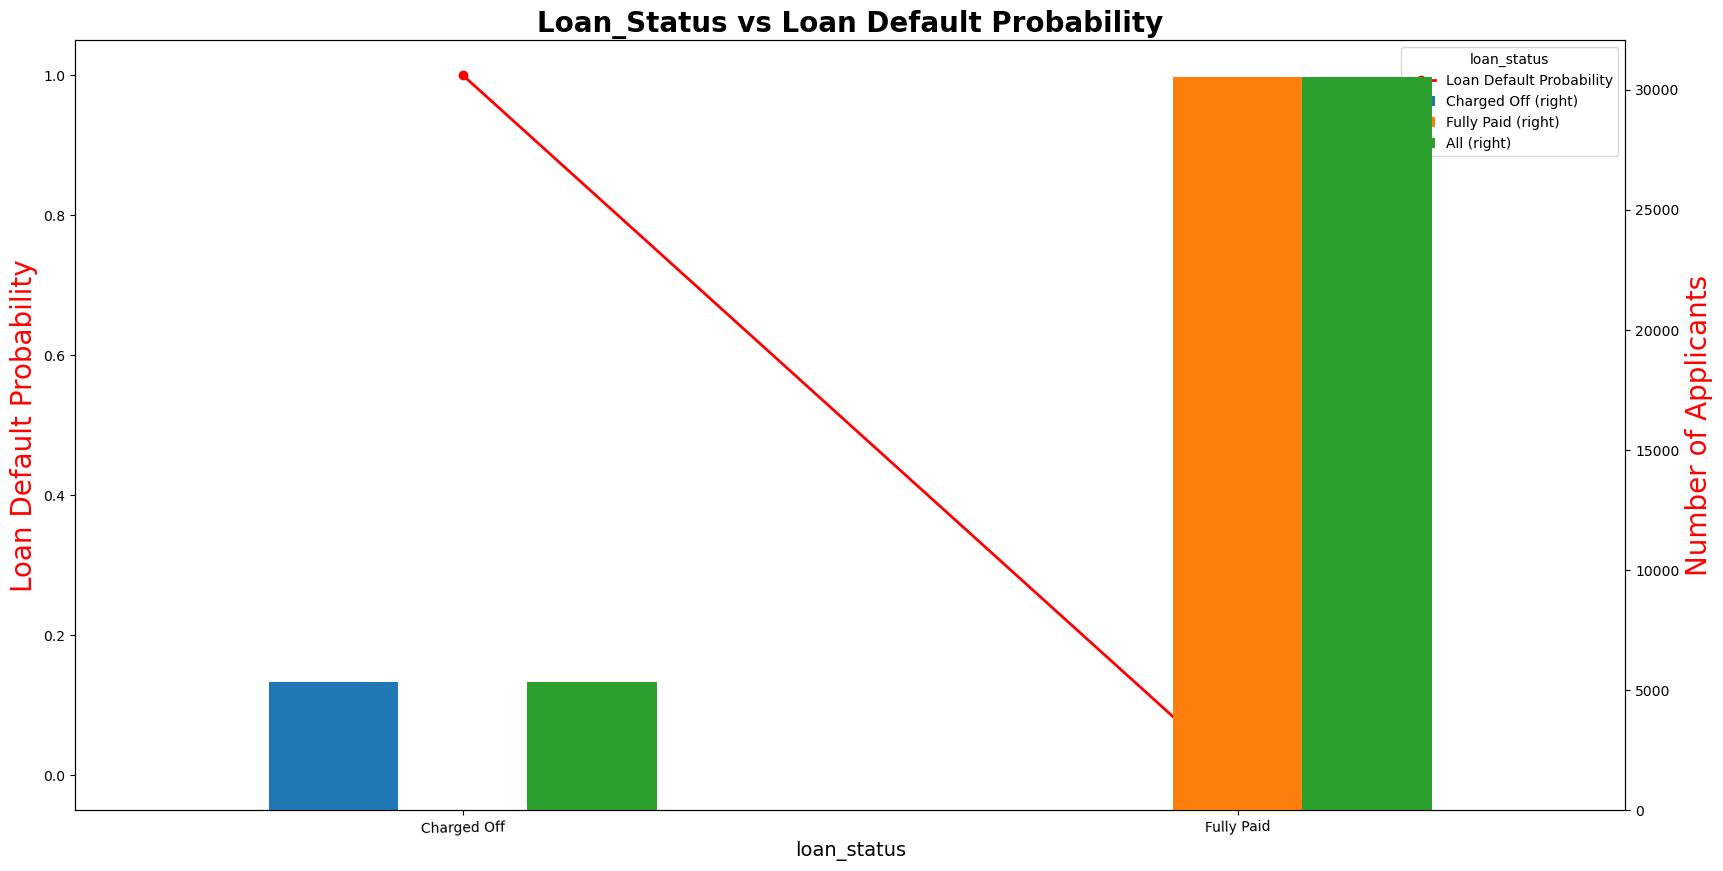

loan_status,Charged Off,Fully Paid,All,Loan Default Probability
term,,,,
36,3070,24113,27183,0.113
60,2266,6425,8691,0.261


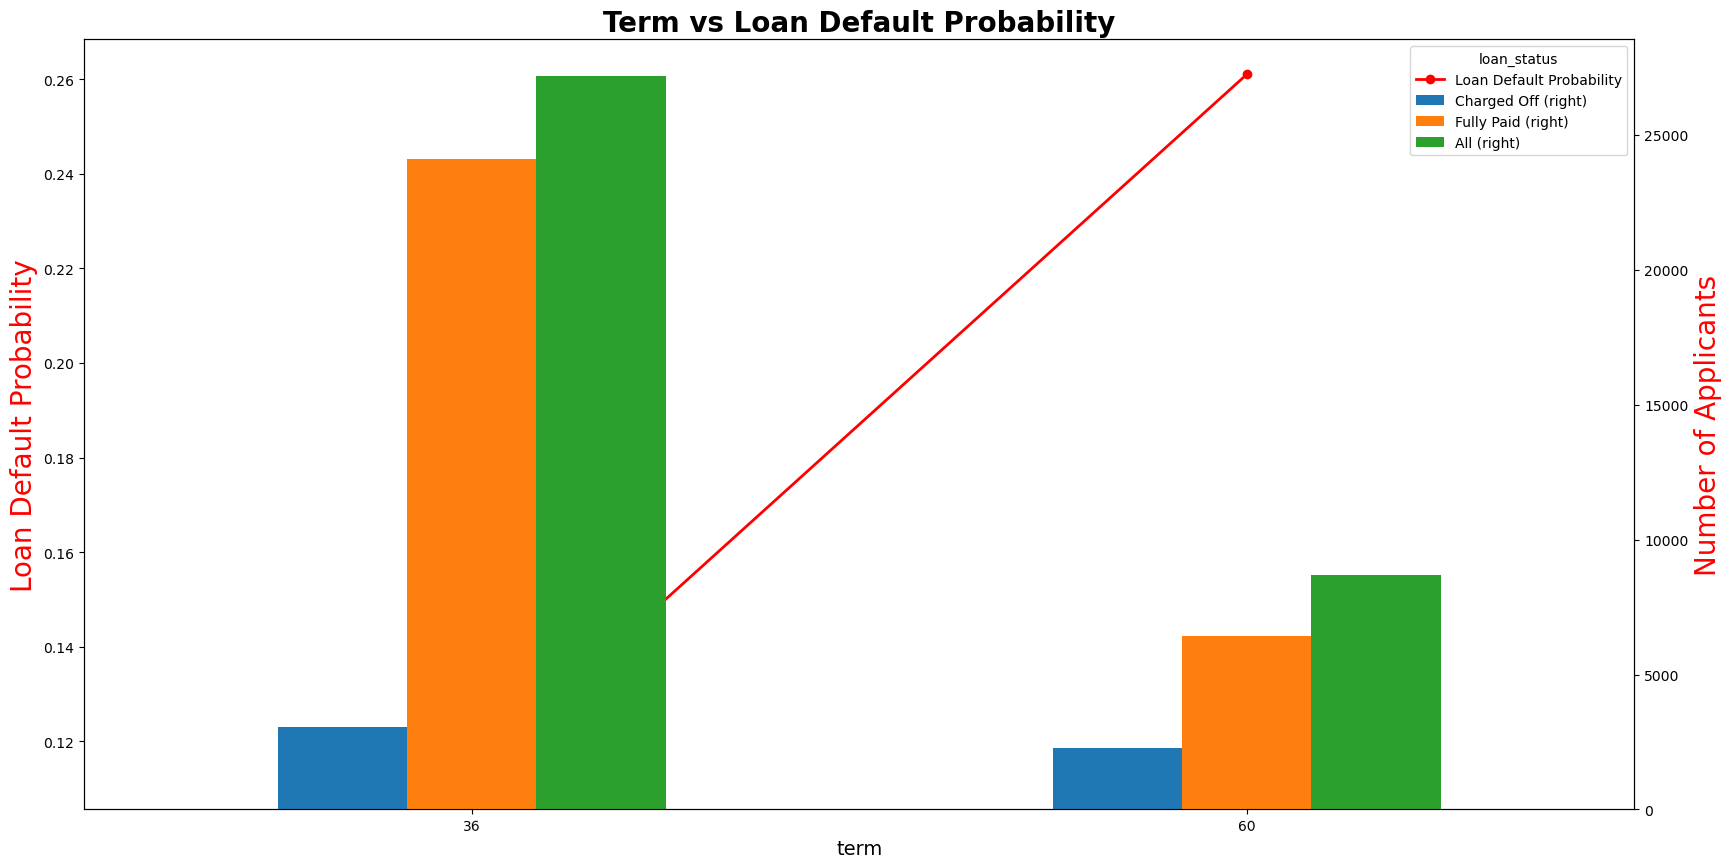

loan_status,Charged Off,Fully Paid,All,Loan Default Probability
Target,,,,
0,0,30538,30538,0.0
1,5336,0,5336,1.0


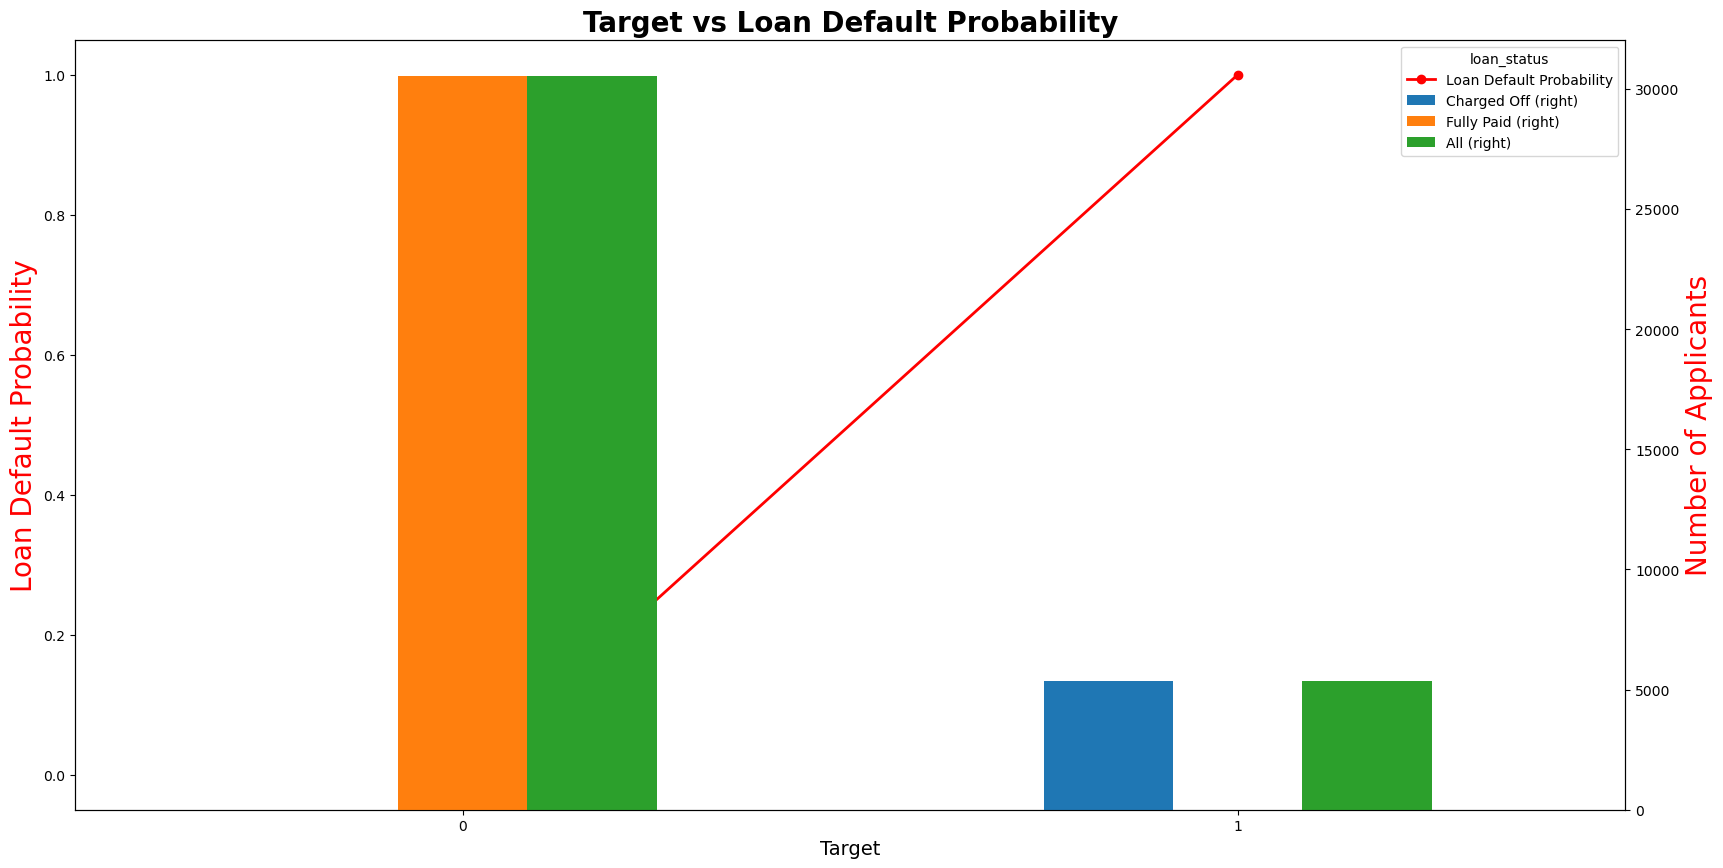

In [ ]:

def calculate_defaulter_percent(dataframe,column) :
    def_tab = pd.crosstab(dataframe[column], dataframe['loan_status'],margins=True)
    def_tab['All'] = def_tab['Charged Off'] +  def_tab['Fully Paid']
    def_tab['Loan Default Probability'] = round((def_tab['Charged Off']/def_tab['All']),3)
    def_tab = def_tab[0:-1] # removing last row with sum totol 
    return def_tab

#calculate_defaulter_percent(loan_df_defaulters, "emp_length")
def plot_bar_line_chart(dataframe,column,stacked=False):
    
    plot = calculate_defaulter_percent(dataframe,column)
    
    display(plot)
    
    #initializing line plot
    linePlot = plot[['Loan Default Probability']] 
    line = linePlot.plot(figsize=(20,10), marker='o',color = 'r',lw=2)
    line.set_title(dataframe[column].name.title()+' vs Loan Default Probability',fontsize=20,weight="bold")
    line.set_xlabel(dataframe[column].name.title(),fontsize=14)
    line.set_ylabel('Loan Default Probability',color = 'r',fontsize=20)
    
    #initializing bar plot
    barPlot =  plot.iloc[:,0:3] 
    bar = barPlot.plot(kind='bar',ax = line,rot=1,secondary_y=True,stacked=stacked)
    bar.set_ylabel('Number of Applicants',color = 'r',fontsize=20)
    
    plt.show()
    
for i in cat_col_final:
    plot_bar_line_chart(loan_df_defaulters,i)    

In [1800]:
# Create Bins for range of Loan Amount / Annual Income / Interest Rates

bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loan_df_defaulters['loan_amnt_range'] = pd.cut(loan_df_defaulters['loan_amnt'], bins, labels=slot)

# Create Bins for range of Annual Income

bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loan_df_defaulters['annual_inc_range'] = pd.cut(loan_df_defaulters['annual_inc'], bins, labels=slot)

# Create Bins for range of Interest rates

bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
loan_df_defaulters['int_rate_range'] = pd.cut(loan_df_defaulters['int_rate'], bins, labels=slot)

loan_df_defaulters.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_year,loan_amnt_range,annual_inc_range,int_rate_range
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,9,f,5000.00,863.16,0.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,0-5000,0-25000,10-12.5
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,4,f,456.46,435.17,0.00,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,0-5000,25000-50000,15 and above
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,10,f,2400.00,605.67,0.00,Jun-14,649.91,May-16,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,0-5000,0-25000,15 and above
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,37,f,10000.00,2214.92,16.97,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,5000-10000,25000-50000,12.5-15
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,38,f,2475.94,1037.39,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,0-5000,75000-100000,12.5-15


loan_status,Charged Off,Current,Fully Paid,All,Loan Default Probability
loan_amnt_range,,,,,
0-5000,1314,96,8158,9472,0.139
5000-10000,1642,158,11160,12802,0.128
10000-15000,1055,303,6628,7683,0.137
15000-20000,751,242,3598,4349,0.173
20000-25000,542,163,2294,2836,0.191
25000 and above,323,178,1112,1435,0.225


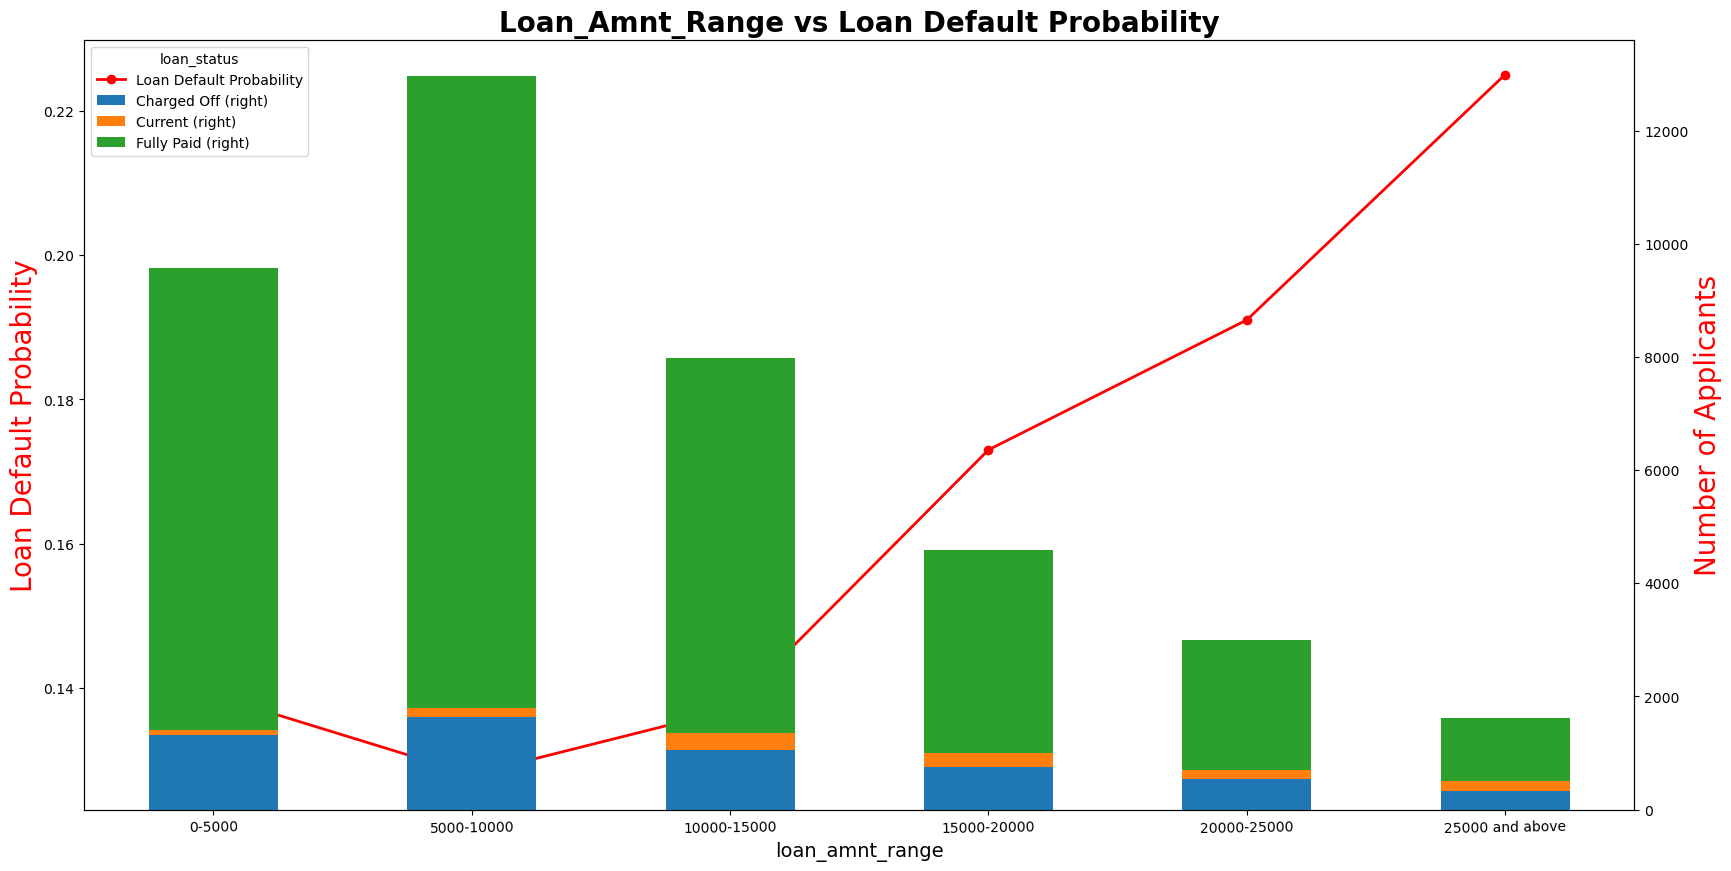

loan_status,Charged Off,Current,Fully Paid,All,Loan Default Probability
int_rate_range,,,,,
0-7.5,256,7,5114,5370,0.048
7.5-10,574,70,6372,6946,0.083
10-12.5,1232,270,8148,9380,0.131
12.5-15,1475,259,7410,8885,0.166
15 and above,1794,432,5432,7226,0.248


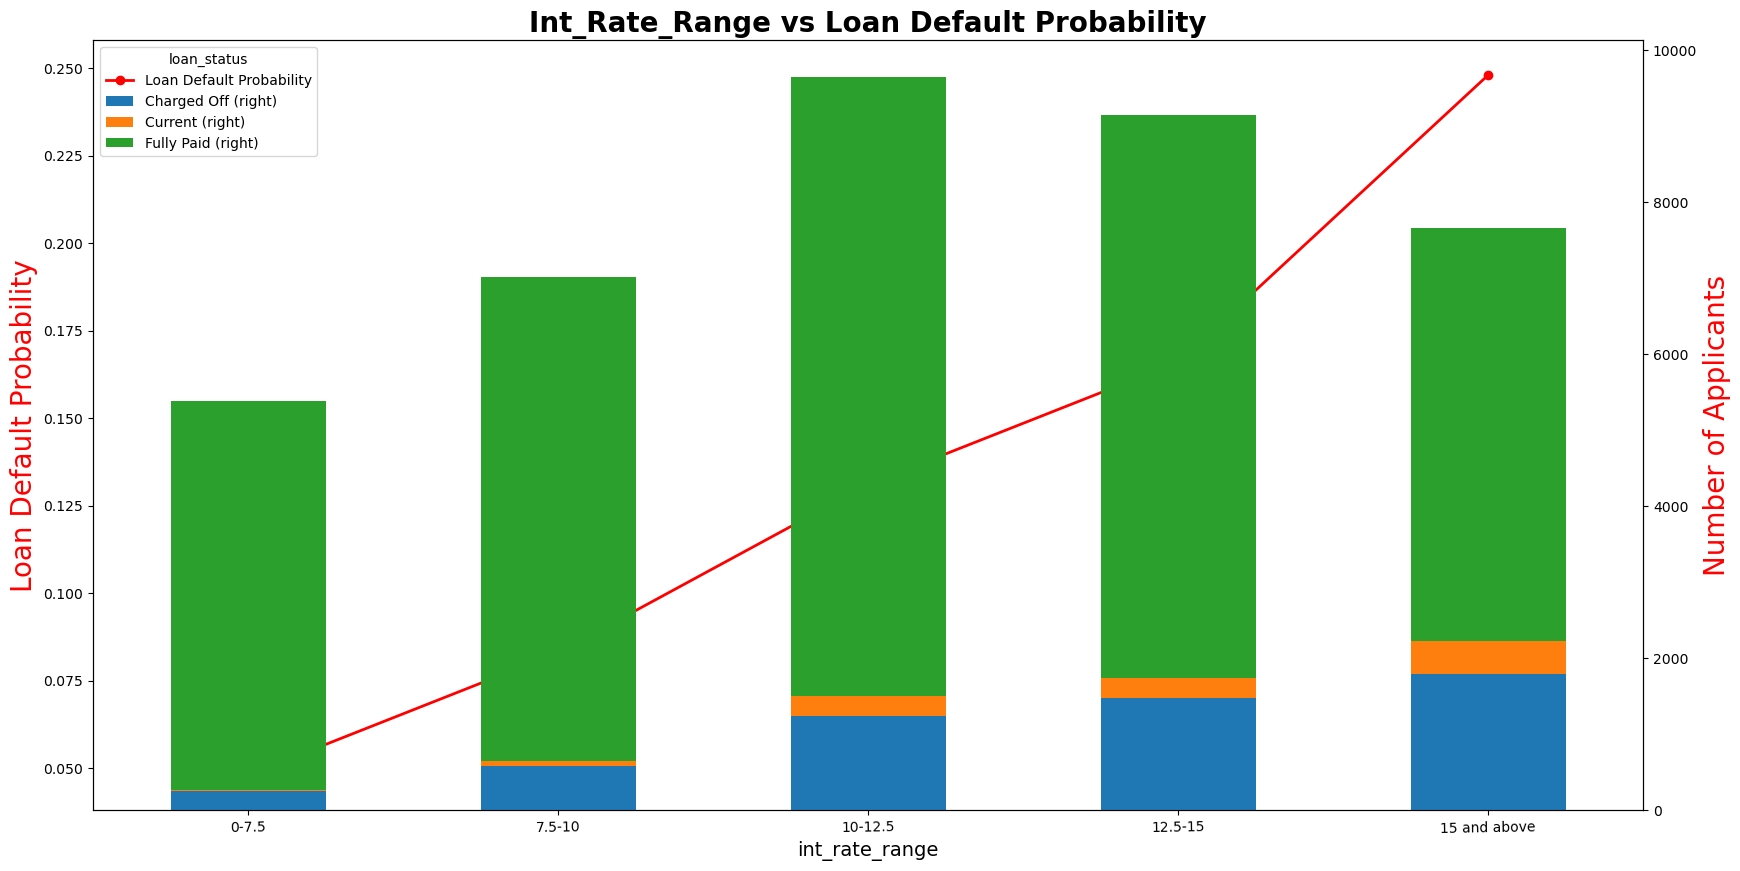

loan_status,Charged Off,Current,Fully Paid,All,Loan Default Probability
annual_inc_range,,,,,
0-25000,488,26,2062,2550,0.191
25000-50000,2125,329,10714,12839,0.166
50000-75000,1686,359,9982,11668,0.144
75000-100000,736,220,5303,6039,0.122
100000 and above,591,206,4876,5467,0.108


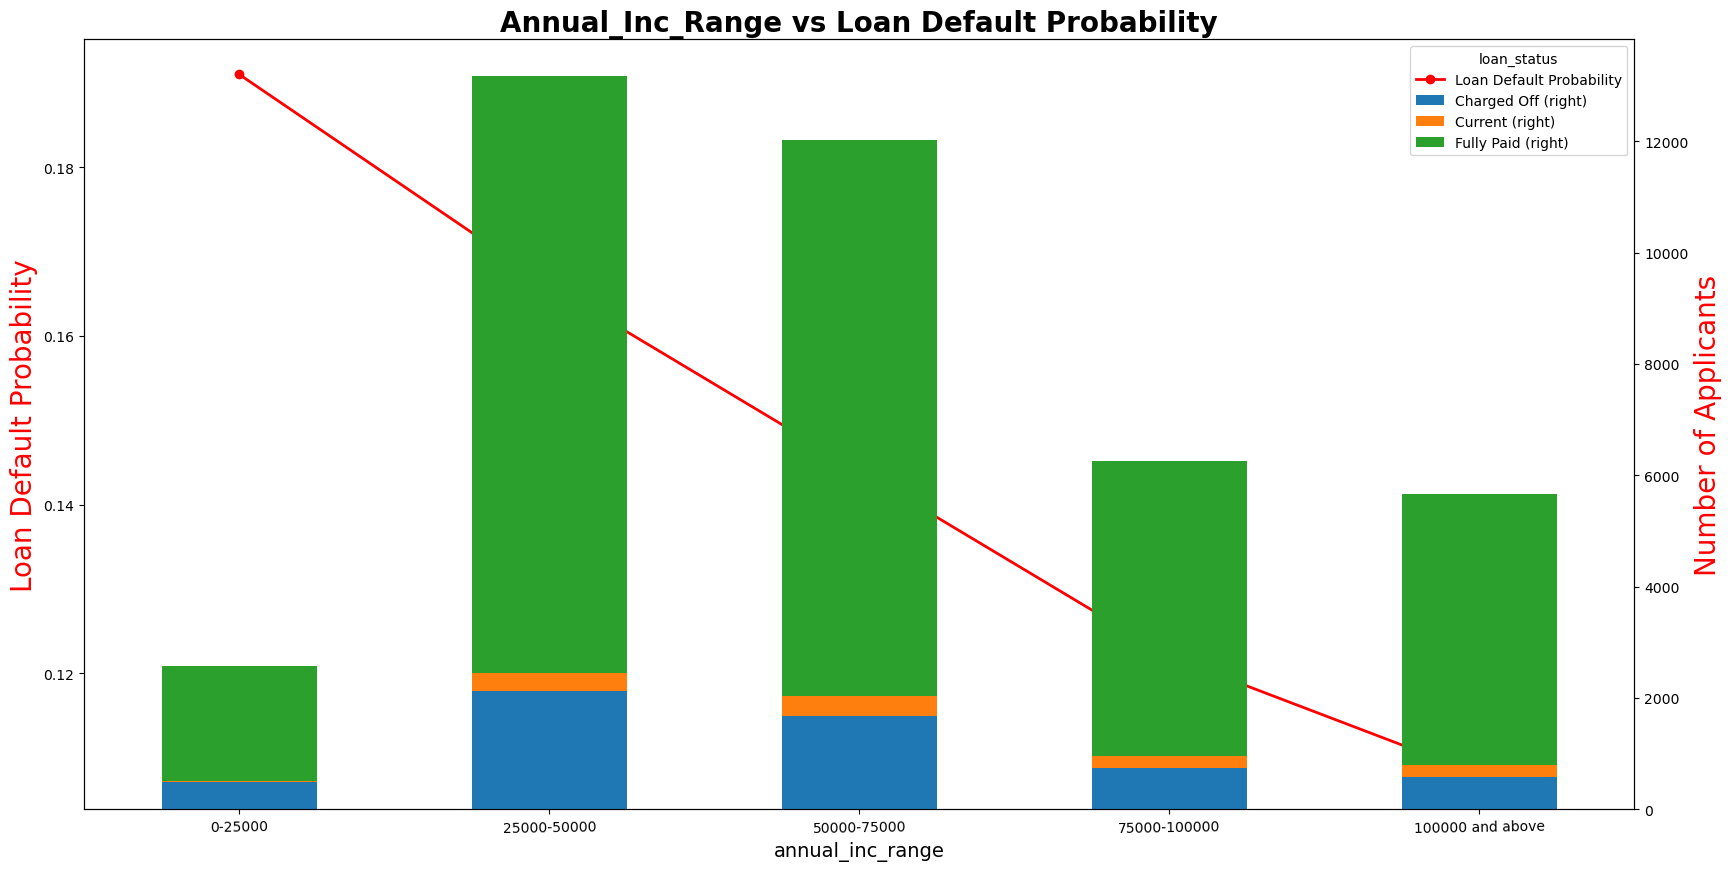

In [1803]:
range_col = ["loan_amnt_range", "int_rate_range", "annual_inc_range"]
for i in range_col:
    plot_bar_line_chart(loan_df_defaulters,i,stacked=True)